# setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import arviz as az
import warnings
import os
import scipy.io
import seaborn as sns
from scipy.stats import sem
from matplotlib.patches import FancyArrowPatch, Polygon
from matplotlib.colors import Normalize
import pickle
import matplotlib.patches as patches
from scipy.signal import medfilt
import matplotlib.colors as mcolors
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import pearsonr, linregress

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
hdi_prob = 0.95

# load table and data

In [3]:
with open('dataTable_2T.pkl', 'rb') as f:
    dataTable_2T = pickle.load(f)
    
dataTable_2T = dataTable_2T.rename(columns={'errorCorrect': 'handError'})

In [4]:
with open('dataTable_8T.pkl', 'rb') as f:
    dataTable_8T = pickle.load(f)

In [5]:
with open('all_data_8T.pkl', 'rb') as f:
    all_data_8T = pickle.load(f)

In [6]:
with open('sortedEpsBeh_2T.pkl', 'rb') as f:
    sortedEpsBeh_2T = pickle.load(f)

In [7]:
with open('sortedEpsBeh_8T.pkl', 'rb') as f:
    sortedEpsBeh_8T = pickle.load(f)

In [8]:
with open('sortedEpsEyes_2T.pkl', 'rb') as f:
    sortedEpsEyes_2T = pickle.load(f)

In [9]:
with open('sortedEpsEyes_8T.pkl', 'rb') as f:
    sortedEpsEyes_8T = pickle.load(f)

In [10]:
all_data_8T.keys()

dict_keys(['16', '17', '19', '20', '22', '23', '24', '25', '26', '28', '29', '30', '32', '33', '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51'])

In [11]:
dataTable_8T[dataTable_8T['subject']==14]

,handError,eyeError,subject,sIndex,trialNum,epIndex,gp,delay,reactionTime
2600,-2.761928,-1.928484,14,13,1,0,0.0,1.0,0.866510
2601,-8.686322,11.639930,14,13,2,0,0.0,1.0,0.733168
2602,-17.458725,0.041376,14,13,3,0,0.0,1.0,0.916391
2603,6.178225,6.910293,14,13,4,0,0.0,1.0,0.750184
2604,5.550873,11.149453,14,13,5,0,0.0,1.0,0.633935
...,...,...,...,...,...,...,...,...,...
2795,15.551841,6.046997,14,13,196,123,0.0,1.0,0.938428
2796,5.146210,8.798135,14,13,197,123,0.0,1.0,0.982885
2797,-2.191826,29.119857,14,13,198,123,0.0,1.0,0.766531
2798,2.017969,49.441578,14,13,199,123,0.0,1.0,0.899989


In [12]:
dataTable_8T[dataTable_8T['subject']==18]

,handError,eyeError,subject,sIndex,trialNum,epIndex,gp,delay,reactionTime
3400,-2.473966,5.218615,18,17,1,0,0.0,1.0,0.567978
3401,6.679863,-17.896563,18,17,2,0,0.0,1.0,0.483396
3402,-11.081070,-6.574228,18,17,3,0,0.0,1.0,0.483944
3403,8.468512,-10.324751,18,17,4,0,0.0,1.0,0.533357
3404,6.283123,-5.877288,18,17,5,0,0.0,1.0,0.482220
...,...,...,...,...,...,...,...,...,...
3595,3.482552,6.055876,18,17,196,123,0.0,1.0,0.508169
3596,-2.152314,4.916048,18,17,197,123,0.0,1.0,0.491128
3597,3.973985,8.258101,18,17,198,123,0.0,1.0,1.256832
3598,1.497335,-2.928881,18,17,199,123,0.0,1.0,0.549949


In [13]:
dataTable_8T[dataTable_8T['gp']==0]['subject'].unique()

array([ 2,  3,  6,  8, 11, 14, 16, 18, 19, 21, 23, 25, 27, 29, 31],
      dtype=int64)

# figure2: measurements

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

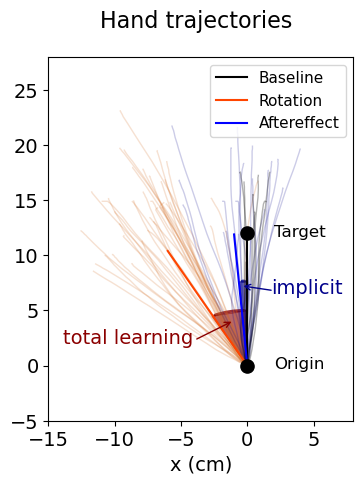

In [14]:
# Plot hand trace of 1 subject for baseline, rotation and aftereffect
subj_id = '26'
rotated_hand = all_data_8T[subj_id]['rotated_hand']
hand_df = all_data_8T[subj_id]['hand']  

rotated_hand_array = [np.array(trial) for trial in rotated_hand]

# 将厘米转换为英寸
width_cm = 10
height_cm = 12
width_inch = width_cm / 2.54
height_inch = height_cm / 2.54
plt.figure(figsize=(width_inch, height_inch))

## traces when calc implicit and total learning
for trialNum in range(130,168):
    rotation_hand, = plt.plot(rotated_hand_array[trialNum][:, 0], rotated_hand_array[trialNum][:, 1], '-', color='chocolate', lw=1, alpha=0.2)
for trialNum in range(170,190):
    aftereffect_hand, = plt.plot(rotated_hand_array[trialNum][:, 0], rotated_hand_array[trialNum][:, 1], '-', color='darkblue', lw=1, alpha=0.2)
for trialNum in [8,10,18,20,25,29,30,47]:
    baseline_hand, = plt.plot(rotated_hand_array[trialNum][:, 0], rotated_hand_array[trialNum][:, 1], '-', color='k', lw=1, alpha=0.3)
    
## mean of baseline
baseline_mean, = plt.plot([0,0], [0,12], '-', color='k', lw=1.5)
# baseline_hand, = plt.plot([0,0], [0,12], '-', color='grey')
rotation_mean, = plt.plot([0,-6], [0,10.4], '-', color='orangered', lw=1.5)
aftereffect_mean, = plt.plot([0,-1], [0,11.9], '-', color='blue', lw=1.5)    
    
# scatter the origin and target
plt.scatter([0, 0], [0, 12], s=90, c='k', marker='o', zorder=3)
# plt.plot([0, 0], [0, 12], color='k')

# Add labels for origin and target
plt.text(2, -0.3, 'Origin', fontsize=12, ha='left')
plt.text(2, 11.7, 'Target', fontsize=12, ha='left')

# Define the start and end points for the arrows
start_total_learning = [-2.65,4.5]  # Last point of rotation trial
end_total_learning = [0,5.0]    # Last point of aftereffect trial

start_implicit = [-0.6,7.6]          # Last point of baseline trial
end_implicit = [0,7.6]          # Last point of aftereffect trial

# Create and add the curved arrows
arrow_total_learning = FancyArrowPatch(start_total_learning, end_total_learning, 
                                       connectionstyle="arc3,rad=-0.1", color="darkred", 
                                       arrowstyle='-', lw=2, linestyle='-', alpha=0.8)
arrow_implicit = FancyArrowPatch(start_implicit, end_implicit, 
                                 connectionstyle="arc3,rad=-0.2", color="darkblue", 
                                 arrowstyle='-', lw=2, linestyle='-', alpha=0.8)

plt.gca().add_patch(arrow_total_learning)
plt.gca().add_patch(arrow_implicit)

# Define the vertices of the polygons to fill the angle areas
total_learning_polygon_points = [start_total_learning, [0, 0], end_total_learning]
implicit_polygon_points = [start_implicit, [0, 0], end_implicit]

# Add the polygons to the plot
plt.gca().add_patch(Polygon(total_learning_polygon_points, closed=True, color='darkred', alpha=0.6))
plt.gca().add_patch(Polygon(implicit_polygon_points, closed=True, color='darkblue', alpha=0.6))

# Add text annotations near the arrows
plt.text(-9, 2, 'total learning', fontsize=14, color='darkred', ha='center')
plt.text(4.5, 6.5, 'implicit', fontsize=14, color='darkblue', ha='center')

# Add arrows from text to curves
plt.annotate('', xy=(-1, 4.1), xytext=(-4, 2.3),
             arrowprops=dict(arrowstyle="->", color='darkred', lw=1))
plt.annotate('', xy=(-0.5, 7.25), xytext=(2, 6.8),
             arrowprops=dict(arrowstyle="->", color='darkblue', lw=1))

plt.xlabel('x (cm)', fontsize=14)
# plt.ylabel('y (cm)', fontsize=14)
plt.suptitle('Hand trajectories', fontsize=16)
plt.legend(handles=[baseline_mean, rotation_mean, aftereffect_mean], 
           labels=['Baseline', 'Rotation', 'Aftereffect'], fontsize=11, loc='upper right')
plt.axis([-15, 8, -5, 28])
# 设置坐标轴刻度字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.grid(True, linestyle='--')

# # save
# plt.savefig(os.path.join(output_folder, '1SubjHandTrace.png'))
# plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

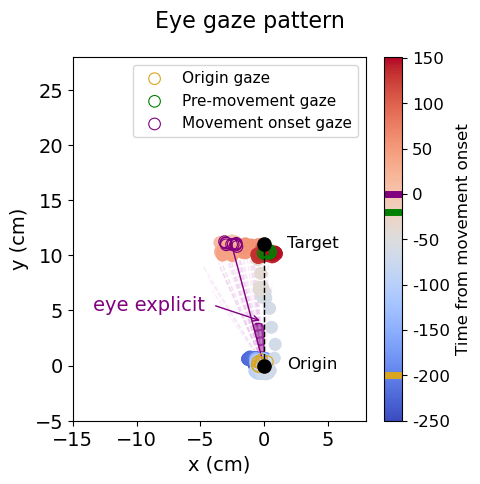

In [15]:
# Plot eye trace of 1 subject for 1 trial in rotation
subj_id = '30'
gRotated = all_data_8T[subj_id]['rotated_gaze'] 

# 将厘米转换为英寸
width_cm = 12
height_cm = 12
width_inch = width_cm / 2.54
height_inch = height_cm / 2.54
plt.figure(figsize=(width_inch, height_inch))

# Create an array of values indicating the order of appearance
order_of_appearance = np.concatenate((np.linspace(-250, 0, 250), np.linspace(0, 151, 151)))
# 选择发散colormap
diverging_cmap = plt.cm.coolwarm

# 画其他rotation trials的eye moveonset
for trialNum in range(130,170):
    rotation_moveonset, = plt.plot([0, gRotated[250, trialNum, 0]], [0, gRotated[250, trialNum, 1]], linestyle='--', color='plum', lw=1, alpha=0.2)
    
# Plot the scatter plot with a color array and a colorbar
rotation_eye = plt.scatter(gRotated[:, 131, 0], gRotated[:, 131, 1], c=order_of_appearance, cmap=diverging_cmap, s=70, zorder=3)

# Add a colorbar
cbar = plt.colorbar(rotation_eye)
cbar.set_label('Time from movement onset', fontsize=12)
# 自定义 colorbar 的字体大小
cbar.ax.tick_params(labelsize=12)
# 自定义 colorbar 的数据范围
cbar.set_ticks([-250, -200, -150, -100, -50, 0, 50, 100, 150])
cbar.set_ticklabels(['-250', '-200', '-150', '-100', '-50', '0', '50', '100', '150'])
  
# Define the positions on the colorbar for origin gaze and pre-movement gaze
origin_gaze_position = -200  
premovement_gaze_position = -20 
moveonset_gaze_position = 0
# Add lines to the colorbar
cbar.ax.hlines(y=origin_gaze_position, xmin=-250, xmax=250, color='goldenrod', linewidth=5)
cbar.ax.hlines(y=premovement_gaze_position, xmin=-250, xmax=250, color='g', linewidth=5)
cbar.ax.hlines(y=moveonset_gaze_position, xmin=-250, xmax=250, color='purple', linewidth=5)
# # Add text annotations on the colorbar
# cbar.ax.text(0.5, (origin_gaze_position + 250) / 400, 'Origin gaze', ha='center', va='center', color='purple', fontsize=12, transform=cbar.ax.transAxes)
# cbar.ax.text(0.5, (premovement_gaze_position + 250) / 400, 'Pre-movement gaze', ha='center', va='center', color='green', fontsize=12, transform=cbar.ax.transAxes)


# rotation_eye = plt.scatter(gRotated[:, 60, 0], gRotated[:, 60, 1], color='grey', s=80)
originHold_eye = plt.scatter(gRotated[[50,60,70,80,90,100,110,120], 131, 0], gRotated[[50,60,70,80,90,100,110,120], 131, 1], 
                             color='goldenrod', s=70, facecolors='none', linewidth=0.8, zorder=5)
targetShow_eye = plt.scatter(gRotated[220:230, 131, 0], gRotated[220:230, 131, 1], 
                             color='g', s=70, facecolors='none', linewidth=0.8, zorder=5)
moveOnset_eye = plt.scatter(gRotated[245:255, 131, 0], gRotated[245:255, 131, 1], 
                            color='purple', s=70, facecolors='none', linewidth=0.8, zorder=5)
rotation_eye_mean, = plt.plot([0, gRotated[250, 131, 0]], [0, gRotated[250, 131, 1]], linestyle='-', color='purple', lw=1, alpha=1, zorder=4)

# scatter the origin and target
plt.scatter([0, 0], [0, 11], s=90, c='k', marker='o', zorder=5)
plt.plot([0, 0], [0, 11], linestyle='--', c='k', lw=1, alpha=1, zorder=5)

# Add labels for origin and target
plt.text(1.8, -0.3, 'Origin', fontsize=12, ha='left')
plt.text(1.8, 10.7, 'Target', fontsize=12, ha='left')

# Define the start and end points for the arrows
end_eye_explicit = gRotated[250, 131]  # End point of the line
origin = np.array([0, 0])  # Origin point

# Calculate the point at 1/3 distance on the line
fraction = 1/3
start_eye_explicit = origin + fraction * (end_eye_explicit - origin)
end_eye_explicit = [0,3.6]

# Create and add the curved arrows
arrow_eye_explicit = FancyArrowPatch(start_eye_explicit, end_eye_explicit, 
                                       connectionstyle="arc3,rad=-0.3", color="purple", 
                                       arrowstyle='-', lw=2, linestyle='-', alpha=1)

plt.gca().add_patch(arrow_eye_explicit)

# Define the vertices of the polygons to fill the angle areas
eye_explicit_polygon_points = [start_eye_explicit, [0, 0], end_eye_explicit]

# Add the polygons to the plot
plt.gca().add_patch(Polygon(eye_explicit_polygon_points, closed=True, color='purple', alpha=0.8))

# Add text annotations near the arrows
plt.text(-9, 5, 'eye explicit', fontsize=14, color='purple', ha='center')

# Add arrows from text to curves
plt.annotate('', xy=(-0.1, 4), xytext=(-4, 5.5),
             arrowprops=dict(arrowstyle="->", color='purple', lw=1), zorder=5)

plt.xlabel('x (cm)', fontsize=14)
plt.ylabel('y (cm)', fontsize=14)
plt.suptitle('Eye gaze pattern', fontsize=16)
plt.legend(handles=[originHold_eye, targetShow_eye, moveOnset_eye], 
           labels=['Origin gaze', 'Pre-movement gaze', 'Movement onset gaze'],
           fontsize=11, loc='upper right')
plt.axis([-15, 8, -5, 28])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(True, linestyle='--')

# # save
# plt.savefig(os.path.join(output_folder, '1SubjEyeTrace.png'))
# plt.show()

# figure3: Individual performance

## 8 targets

In [16]:
# hand model results for subj_id_ND = '39'
mean_handError_subjND_EB = sortedEpsBeh_8T['earlyBaseSubjMeans'][0][8][0]
hdi_handError_subjND_EB = sortedEpsBeh_8T['earlyBaseSubjHDI'][0][8][0]
mean_handError_subjND_LB = sortedEpsBeh_8T['lateBaseSubjMeans'][0][8][0]
hdi_handError_subjND_LB = sortedEpsBeh_8T['lateBaseSubjHDI'][0][8][0]
mean_handError_subjND_IM = sortedEpsBeh_8T['implicitSubjMeans'][0][8][0]
hdi_handError_subjND_IM = sortedEpsBeh_8T['implicitSubjHDI'][0][8][0]
mean_handError_subjND_AE = sortedEpsBeh_8T['afterSubjMeans'][0][8][0]
hdi_handError_subjND_AE = sortedEpsBeh_8T['afterSubjHDI'][0][8][0]
mean_handError_subjND_Adapt = np.nanmean(sortedEpsBeh_8T['adaptSubjSamples'][0][8], axis=0)
hdi_handError_subjND_Adapt = sortedEpsBeh_8T['adaptSubjHDI'][0][8]

mean_handError_subjND = np.concatenate((np.full(25, mean_handError_subjND_EB),
                                        np.full(25, mean_handError_subjND_LB),
                                        mean_handError_subjND_Adapt,
                                        np.full(8, mean_handError_subjND_IM),
                                        np.full(22, mean_handError_subjND_AE)))

In [17]:
mean_handError_subjND_IM

-3.376418889838118

In [18]:
hdi_handError_subjND_IM

array([-8.63149941,  1.91557148])

In [19]:
# eye model results for subj_id_ND = '39'
mean_eyeError_subjND_EB = sortedEpsEyes_8T['earlyBaseSubjMeans'][0][8][0]
hdi_eyeError_subjND_EB = sortedEpsEyes_8T['earlyBaseSubjHDI'][0][8][0]
mean_eyeError_subjND_LB = sortedEpsEyes_8T['lateBaseSubjMeans'][0][8][0]
hdi_eyeError_subjND_LB = sortedEpsEyes_8T['lateBaseSubjHDI'][0][8][0]
mean_eyeError_subjND_IM = sortedEpsEyes_8T['implicitSubjMeans'][0][8][0]
hdi_eyeError_subjND_IM = sortedEpsEyes_8T['implicitSubjHDI'][0][8][0]
mean_eyeError_subjND_AE = sortedEpsEyes_8T['afterSubjMeans'][0][8][0]
hdi_eyeError_subjND_AE = sortedEpsEyes_8T['afterSubjHDI'][0][8][0]
mean_eyeError_subjND_Adapt = np.nanmean(sortedEpsEyes_8T['adaptSubjSamples'][0][8], axis=0)
hdi_eyeError_subjND_Adapt = sortedEpsEyes_8T['adaptSubjHDI'][0][8]

mean_eyeError_subjND = np.concatenate((np.full(25, mean_eyeError_subjND_EB),
                                        np.full(25, mean_eyeError_subjND_LB),
                                        mean_eyeError_subjND_Adapt, 
                                        np.full(8, mean_eyeError_subjND_AE),
                                        np.full(22, mean_eyeError_subjND_AE)))

In [20]:
sortedEpsEyes_8T['lastAdaptSubjMeans'][0][8].mean()

-9.60603470479171

In [21]:
sortedEpsEyes_8T['lastAdaptSubjHDI'][0][8].mean(axis=0)

array([-1.90947048e+01, -1.21828927e-02])

In [22]:
# hand model results for subj_id_LD = '36'
mean_handError_subjLD_EB = sortedEpsBeh_8T['earlyBaseSubjMeans'][1][9][0]
hdi_handError_subjLD_EB = sortedEpsBeh_8T['earlyBaseSubjHDI'][1][9][0]
mean_handError_subjLD_LB = sortedEpsBeh_8T['lateBaseSubjMeans'][1][9][0]
hdi_handError_subjLD_LB = sortedEpsBeh_8T['lateBaseSubjHDI'][1][9][0]
mean_handError_subjLD_IM = sortedEpsBeh_8T['implicitSubjMeans'][1][9][0]
hdi_handError_subjLD_IM = sortedEpsBeh_8T['implicitSubjHDI'][1][9][0]
mean_handError_subjLD_AE = sortedEpsBeh_8T['afterSubjMeans'][1][9][0]
hdi_handError_subjLD_AE = sortedEpsBeh_8T['afterSubjHDI'][1][9][0]
mean_handError_subjLD_Adapt = np.nanmean(sortedEpsBeh_8T['adaptSubjSamples'][1][9], axis=0)
hdi_handError_subjLD_Adapt = sortedEpsBeh_8T['adaptSubjHDI'][1][9]

mean_handError_subjLD = np.concatenate((np.full(25, mean_handError_subjLD_EB),
                                        np.full(25, mean_handError_subjLD_LB),
                                        mean_handError_subjLD_Adapt, 
                                        np.full(8, mean_handError_subjLD_IM),
                                        np.full(22, mean_handError_subjLD_AE)))

In [23]:
mean_handError_subjLD_AE

-1.9421651547295495

In [24]:
hdi_handError_subjLD_AE

array([-4.71455617,  1.23766984])

In [25]:
# eye model results for subj_id_LD = '36'
mean_eyeError_subjLD_EB = sortedEpsEyes_8T['earlyBaseSubjMeans'][1][9][0]
hdi_eyeError_subjLD_EB = sortedEpsEyes_8T['earlyBaseSubjHDI'][1][9][0]
mean_eyeError_subjLD_LB = sortedEpsEyes_8T['lateBaseSubjMeans'][1][9][0]
hdi_eyeError_subjLD_LB = sortedEpsEyes_8T['lateBaseSubjHDI'][1][9][0]
mean_eyeError_subjLD_IM = sortedEpsEyes_8T['implicitSubjMeans'][1][9][0]
hdi_eyeError_subjLD_IM = sortedEpsEyes_8T['implicitSubjHDI'][1][9][0]
mean_eyeError_subjLD_AE = sortedEpsEyes_8T['afterSubjMeans'][1][9][0]
hdi_eyeError_subjLD_AE = sortedEpsEyes_8T['afterSubjHDI'][1][9][0]
mean_eyeError_subjLD_Adapt = np.nanmean(sortedEpsEyes_8T['adaptSubjSamples'][1][9], axis=0)
hdi_eyeError_subjLD_Adapt = sortedEpsEyes_8T['adaptSubjHDI'][1][9]

mean_eyeError_subjLD = np.concatenate((np.full(25, mean_eyeError_subjLD_EB),
                                        np.full(25, mean_eyeError_subjLD_LB),
                                        mean_eyeError_subjLD_Adapt,
                                        np.full(8, mean_eyeError_subjLD_IM),
                                        np.full(22, mean_eyeError_subjLD_AE)))

In [26]:
sortedEpsEyes_8T['lastAdaptSubjMeans'][1][9].mean()

-16.273907902225837

In [27]:
sortedEpsEyes_8T['lastAdaptSubjHDI'][1][9].mean(axis=0)

array([-26.92759159,  -5.58705515])

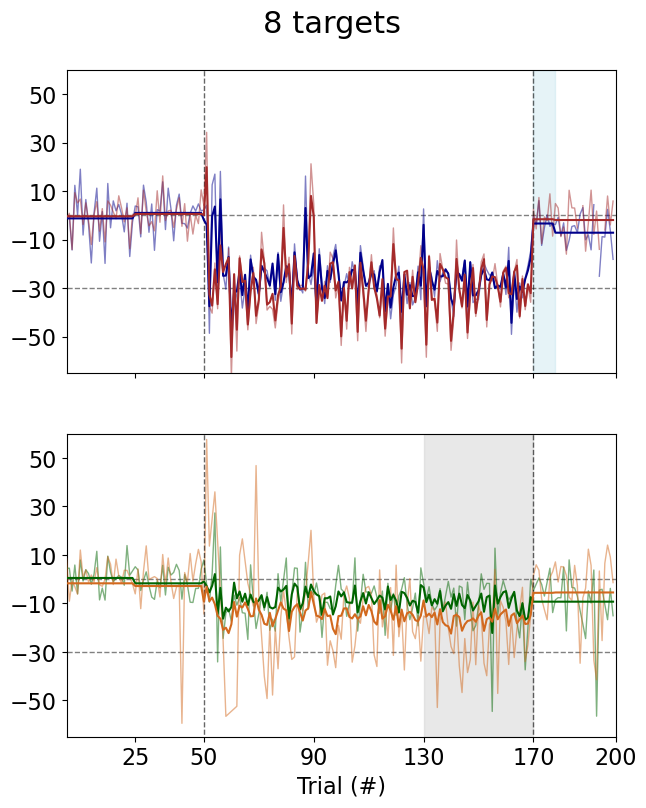

In [28]:
# plot lerning curve of this experiment including both 2 groups
subj_id_ND = '39'   #第19个subject，是no delay组第9个
subj_id_LD = '36'   #第17个subject，是long delay组第10个
handError_ND = all_data_8T[subj_id_ND]['handError'] 
eyeError_ND = all_data_8T[subj_id_ND]['eyeError'] 
handError_LD = all_data_8T[subj_id_LD]['handError'] 
eyeError_LD = all_data_8T[subj_id_LD]['eyeError']  

# 将厘米转换为英寸
width_cm = 18
height_cm = 22
width_inch = width_cm / 2.54
height_inch = height_cm / 2.54

# 创建一个2x1的子图布局
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(width_inch, height_inch), sharex=True)

# 在第一个子图上绘制手部数据
line1, = ax1.plot(handError_ND, linewidth=1, color='darkblue', linestyle='-', alpha=0.5, zorder=4)
line2, = ax1.plot(handError_LD, linewidth=1, color='brown', linestyle='-', alpha=0.5, zorder=4)
line3, = ax1.plot(mean_handError_subjND, linewidth=1.5, color='darkblue', linestyle='-', zorder=5)
line4, = ax1.plot(mean_handError_subjLD, linewidth=1.5, color='brown', linestyle='-', zorder=5)

# ax1.set_ylabel('Angular difference (degree)', fontsize=16)
ax1.set_ylim(-70, 55)
ax1.set_xlim(1, 200)
ax1.plot([0, 200], [0, 0], '--', linewidth=1, color='grey')
ax1.plot([0, 200], [-30, -30], '--', linewidth=1, color='grey')

# 在第二个子图上绘制眼部数据
line5, = ax2.plot(eyeError_ND, linewidth=1, color='darkgreen', linestyle='-', alpha=0.5, zorder=4)
line6, = ax2.plot(eyeError_LD, linewidth=1, color='chocolate', linestyle='-', alpha=0.5, zorder=4)
line7, = ax2.plot(mean_eyeError_subjND, linewidth=1.5, color='darkgreen', linestyle='-', zorder=5)
line8, = ax2.plot(mean_eyeError_subjLD, linewidth=1.5, color='chocolate', linestyle='-', zorder=5)
# ax2.set_ylabel('Angular difference (degrees)', fontsize=16)
ax2.set_xlabel('Trial (#)', fontsize=16)
ax2.set_ylim(-70, 55)
ax2.set_xlim(1, 200)
ax2.plot([0, 200], [0, 0], '--', linewidth=1, color='grey')
ax2.plot([0, 200], [-30, -30], '--', linewidth=1, color='grey')

# 绘制分段虚线
ax1.plot([50,50], [-70,80], linewidth=1, color='k', linestyle='--', alpha=0.6, zorder=4)
ax1.plot([170,170], [-70,80], linewidth=1, color='k', linestyle='--', alpha=0.6, zorder=4)
ax2.plot([50,50], [-70,80], linewidth=1, color='k', linestyle='--', alpha=0.6, zorder=4)
ax2.plot([170,170], [-70,80], linewidth=1, color='k', linestyle='--', alpha=0.6, zorder=4)

# 在x轴上绘制不同阶段的背景色
implicit_patch = patches.Patch(color='lightblue', alpha=0.3, label='Implicit Measurement')
eye_explicit_patch = patches.Patch(color='lightgrey', alpha=0.5, label='Eye Explicit Measurement')
ax1.axvspan(170, 178, color='lightblue', alpha=0.3)  # implicit
ax2.axvspan(130, 170, color='lightgrey', alpha=0.5)  # eye explicit

# 添加总标题
fig.suptitle('8 targets', fontsize=22, y=0.95)
# # 添加子标题
# ax1.set_title('Hand Error', fontsize=18)
# ax2.set_title('Eye Error', fontsize=18)

# 获取现有的线条图例句柄和标签
lines_labels = ax1.get_legend_handles_labels()

# # 添加背景色图例
# handles1 = [line3, line4]
# labels1 = ['No delay', 'Long delay']
# handles2 = [line7, line8]
# labels2 = ['No delay', 'Long delay']

# # 添加图例到第一个子图
# ax1.legend(handles1, labels1, fontsize=14, loc='upper right')
# # 添加图例到第二个子图
# ax2.legend(handles2, labels2, fontsize=14, loc='upper right')

# 设置y轴刻度为每10
ax1.set_yticks(range(-50, 51, 20))
ax2.set_yticks(range(-50, 51, 20))
# 设置x轴刻度至少显示50、170和200
ax1.set_xticks([25, 50, 90, 130, 170, 200])
ax2.set_xticks([25, 50, 90, 130, 170, 200])

ax1.set_ylim(-65, 60)
ax1.set_xlim(0, 200) 
ax2.set_ylim(-65, 60)
ax2.set_xlim(0, 200) 

# 设置刻度标签大小
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

# # 调整子图之间的间距
# plt.subplots_adjust(hspace=0.2)

# # save
# plt.savefig(os.path.join(output_folder, 'individualLearningCurve8T.png'))

plt.show()

## 2 targets

In [29]:
# 选择一个 gp = 0 的 subject 和一个 gp = 1 的 subject
subject_gp0 = dataTable_2T[(dataTable_2T['delay'] == 1) & (dataTable_2T['subject'] == 31)]  # 18 31 32
subject_gp1 = dataTable_2T[(dataTable_2T['delay'] == 2) & (dataTable_2T['subject'] == 28)] # 9 19 28 33 36

subject_gp0_hand = subject_gp0['handError'].values
subject_gp1_hand = subject_gp1['handError'].values
subject_gp0_eye = subject_gp0['eyeError'].values
subject_gp1_eye = subject_gp1['eyeError'].values

In [30]:
# hand model results for subject_gp0  31  # no delay group 第15个
mean_handError_subjND_EB = sortedEpsBeh_2T['earlyBaseSubjMeans'][0][14][0]
hdi_handError_subjND_EB = sortedEpsBeh_2T['earlyBaseSubjHDI'][0][14][0]
mean_handError_subjND_LB = sortedEpsBeh_2T['lateBaseSubjMeans'][0][14][0]
hdi_handError_subjND_LB = sortedEpsBeh_2T['lateBaseSubjHDI'][0][14][0]
mean_handError_subjND_IM = sortedEpsBeh_2T['implicitSubjMeans'][0][14][0]
hdi_handError_subjND_IM = sortedEpsBeh_2T['implicitSubjHDI'][0][14][0]
mean_handError_subjND_AE = sortedEpsBeh_2T['afterSubjMeans'][0][14][0]
hdi_handError_subjND_AE = sortedEpsBeh_2T['afterSubjHDI'][0][14][0]
mean_handError_subjND_Adapt = np.nanmean(sortedEpsBeh_2T['adaptSubjSamples'][0][14], axis=0)
hdi_handError_subjND_Adapt = sortedEpsBeh_2T['adaptSubjHDI'][0][14]

mean_handError_subjND = np.concatenate((np.full(25, mean_handError_subjND_EB),
                                        np.full(25, mean_handError_subjND_LB),
                                        mean_handError_subjND_Adapt, 
                                        np.full(8, mean_handError_subjND_IM),
                                        np.full(12, mean_handError_subjND_AE)))

In [31]:
mean_handError_subjND_IM

-13.918221587695232

In [32]:
hdi_handError_subjND_IM

array([-18.01470682,  -9.64137101])

In [33]:
mean_handError_subjND_AE

-17.388477242816297

In [34]:
hdi_handError_subjND_AE

array([-20.75602989, -13.89773026])

In [35]:
# eye model results for subject_gp0  31
mean_eyeError_subjND_EB = sortedEpsEyes_2T['earlyBaseSubjMeans'][0][14][0]
hdi_eyeError_subjND_EB = sortedEpsEyes_2T['earlyBaseSubjHDI'][0][14][0]
mean_eyeError_subjND_LB = sortedEpsEyes_2T['lateBaseSubjMeans'][0][14][0]
hdi_eyeError_subjND_LB = sortedEpsEyes_2T['lateBaseSubjHDI'][0][14][0]
mean_eyeError_subjND_IM = sortedEpsEyes_2T['implicitSubjMeans'][0][14][0]
hdi_eyeError_subjND_IM = sortedEpsEyes_2T['implicitSubjHDI'][0][14][0]
mean_eyeError_subjND_AE = sortedEpsEyes_2T['afterSubjMeans'][0][14][0]
hdi_eyeError_subjND_AE = sortedEpsEyes_2T['afterSubjHDI'][0][14][0]
mean_eyeError_subjND_Adapt = np.nanmean(sortedEpsEyes_2T['adaptSubjSamples'][0][14], axis=0)
hdi_eyeError_subjND_Adapt = sortedEpsEyes_2T['adaptSubjHDI'][0][14]

mean_eyeError_subjND = np.concatenate((np.full(25, mean_eyeError_subjND_EB),
                                        np.full(25, mean_eyeError_subjND_LB),
                                        mean_eyeError_subjND_Adapt, 
                                        np.full(8, mean_eyeError_subjND_IM),
                                        np.full(12, mean_eyeError_subjND_AE)))

In [36]:
sortedEpsEyes_2T['lastAdaptSubjMeans'][0][14].mean()

0.2754314942237965

In [37]:
sortedEpsEyes_2T['lastAdaptSubjHDI'][0][14].mean(axis=0)

array([-7.85885089,  8.68807566])

In [38]:
# hand model results for subject_gp1  28  # long delay group 第15个
mean_handError_subjLD_EB = sortedEpsBeh_2T['earlyBaseSubjMeans'][1][14][0]
hdi_handError_subjLD_EB = sortedEpsBeh_2T['earlyBaseSubjHDI'][1][14][0]
mean_handError_subjLD_LB = sortedEpsBeh_2T['lateBaseSubjMeans'][1][14][0]
hdi_handError_subjLD_LB = sortedEpsBeh_2T['lateBaseSubjHDI'][1][14][0]
mean_handError_subjLD_IM = sortedEpsBeh_2T['implicitSubjMeans'][1][14][0]
hdi_handError_subjLD_IM = sortedEpsBeh_2T['implicitSubjHDI'][1][14][0]
mean_handError_subjLD_AE = sortedEpsBeh_2T['afterSubjMeans'][1][14][0]
hdi_handError_subjLD_AE = sortedEpsBeh_2T['afterSubjHDI'][1][14][0]
mean_handError_subjLD_Adapt = np.nanmean(sortedEpsBeh_2T['adaptSubjSamples'][1][14], axis=0)
hdi_handError_subjLD_Adapt = sortedEpsBeh_2T['adaptSubjHDI'][1][14]

mean_handError_subjLD = np.concatenate((np.full(25, mean_handError_subjLD_EB),
                                        np.full(25, mean_handError_subjLD_LB),
                                        mean_handError_subjLD_Adapt, 
                                        np.full(8, mean_handError_subjLD_IM),
                                        np.full(12, mean_handError_subjLD_AE)))

In [39]:
mean_handError_subjLD_IM

2.5628174710366576

In [40]:
hdi_handError_subjLD_IM

array([-1.60003124,  6.56551568])

In [41]:
mean_handError_subjLD_AE

5.115996514128056

In [42]:
hdi_handError_subjLD_AE

array([1.81720502, 8.77918088])

In [43]:
# eye model results for subject_gp1  28
mean_eyeError_subjLD_EB = sortedEpsEyes_2T['earlyBaseSubjMeans'][1][14][0]
hdi_eyeError_subjLD_EB = sortedEpsEyes_2T['earlyBaseSubjHDI'][1][14][0]
mean_eyeError_subjLD_LB = sortedEpsEyes_2T['lateBaseSubjMeans'][1][14][0]
hdi_eyeError_subjLD_LB = sortedEpsEyes_2T['lateBaseSubjHDI'][1][14][0]
mean_eyeError_subjLD_IM = sortedEpsEyes_2T['implicitSubjMeans'][1][14][0]
hdi_eyeError_subjLD_IM = sortedEpsEyes_2T['implicitSubjHDI'][1][14][0]
mean_eyeError_subjLD_AE = sortedEpsEyes_2T['afterSubjMeans'][1][14][0]
hdi_eyeError_subjLD_AE = sortedEpsEyes_2T['afterSubjHDI'][1][14][0]
mean_eyeError_subjLD_Adapt = np.nanmean(sortedEpsEyes_2T['adaptSubjSamples'][1][14], axis=0)
hdi_eyeError_subjLD_Adapt = sortedEpsEyes_2T['adaptSubjHDI'][1][14]

mean_eyeError_subjLD = np.concatenate((np.full(25, mean_eyeError_subjLD_EB),
                                        np.full(25, mean_eyeError_subjLD_LB),
                                        mean_eyeError_subjLD_Adapt, 
                                        np.full(8, mean_eyeError_subjLD_IM),
                                        np.full(12, mean_eyeError_subjLD_AE)))

In [44]:
sortedEpsEyes_2T['lastAdaptSubjMeans'][1][14].mean()

-14.203415645710544

In [45]:
sortedEpsEyes_2T['lastAdaptSubjHDI'][1][14].mean(axis=0)

array([-23.08901591,  -5.32626821])

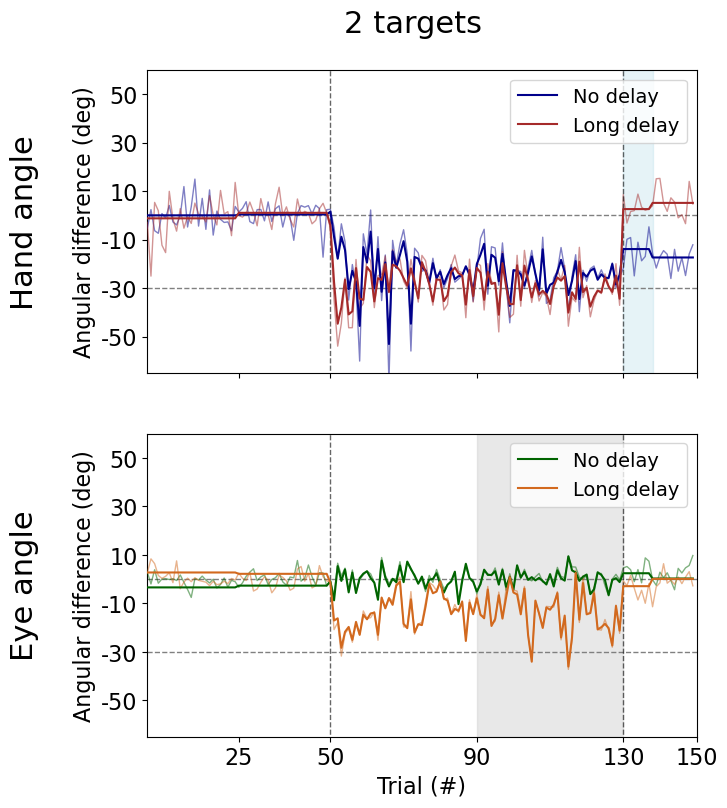

In [46]:
# 将厘米转换为英寸
width_cm = 18
height_cm = 22
width_inch = width_cm / 2.54
height_inch = height_cm / 2.54

# 创建一个2x1的子图布局
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(width_inch, height_inch), sharex=True)

# 在第一个子图上绘制手部数据
line1, = ax1.plot(subject_gp0_hand, linewidth=1, color='darkblue', linestyle='-', alpha=0.5, zorder=4)
line2, = ax1.plot(subject_gp1_hand, linewidth=1, color='brown', linestyle='-', alpha=0.5, zorder=4)
line3, = ax1.plot(mean_handError_subjND, linewidth=1.5, color='darkblue', linestyle='-', zorder=5)
line4, = ax1.plot(mean_handError_subjLD, linewidth=1.5, color='brown', linestyle='-', zorder=5)

ax1.set_ylabel('Angular difference (deg)', fontsize=16)
ax1.plot([0, 150], [0, 0], '--', linewidth=1, color='grey')
ax1.plot([0, 150], [-30, -30], '--', linewidth=1, color='grey')

# 在第二个子图上绘制眼部数据
line5, = ax2.plot(subject_gp0_eye, linewidth=1, color='darkgreen', linestyle='-', alpha=0.5, zorder=4)
line6, = ax2.plot(subject_gp1_eye, linewidth=1, color='chocolate', linestyle='-', alpha=0.5, zorder=4)
line7, = ax2.plot(mean_eyeError_subjND, linewidth=1.5, color='darkgreen', linestyle='-', zorder=5)
line8, = ax2.plot(mean_eyeError_subjLD, linewidth=1.5, color='chocolate', linestyle='-', zorder=5)
ax2.set_ylabel('Angular difference (deg)', fontsize=16)
ax2.set_xlabel('Trial (#)', fontsize=16)
ax2.plot([0, 150], [0, 0], '--', linewidth=1, color='grey')
ax2.plot([0, 150], [-30, -30], '--', linewidth=1, color='grey')

# 绘制分段虚线
ax1.plot([50,50], [-70,80], linewidth=1, color='k', linestyle='--', alpha=0.6, zorder=4)
ax1.plot([130,130], [-70,80], linewidth=1, color='k', linestyle='--', alpha=0.6, zorder=4)
ax2.plot([50,50], [-70,80], linewidth=1, color='k', linestyle='--', alpha=0.6, zorder=4)
ax2.plot([130,130], [-70,80], linewidth=1, color='k', linestyle='--', alpha=0.6, zorder=4)

# 在x轴上绘制不同阶段的背景色
implicit_patch = patches.Patch(color='lightblue', alpha=0.3, label='Implicit Measurement')
eye_explicit_patch = patches.Patch(color='lightgrey', alpha=0.5, label='Eye Explicit Measurement')
ax1.axvspan(130, 138, color='lightblue', alpha=0.3)  # implicit
ax2.axvspan(90, 130, color='lightgrey', alpha=0.5)  # eye explicit

# 添加总标题
fig.suptitle('2 targets', fontsize=22, y=0.95)
# 添加子标题
# ax1.set_ylabel('Hand Error\nAngular difference (deg)', fontsize=16, labelpad=10)
# ax2.set_ylabel('Eye Error\nAngular difference (deg)', fontsize=16, labelpad=10)
ax1.text(-0.25, 0.5, 'Hand angle', transform=ax1.transAxes, fontsize=22, va='center', rotation='vertical')
ax2.text(-0.25, 0.5, 'Eye angle', transform=ax2.transAxes, fontsize=22, va='center', rotation='vertical')

# 获取现有的线条图例句柄和标签
lines_labels = ax1.get_legend_handles_labels()

# 添加背景色图例
handles1 = [line3, line4]
labels1 = ['No delay', 'Long delay']
handles2 = [line7, line8]
labels2 = ['No delay', 'Long delay']

# 添加图例到第一个子图
ax1.legend(handles1, labels1, fontsize=14, loc='upper right')
# 添加图例到第二个子图
ax2.legend(handles2, labels2, fontsize=14, loc='upper right')

# 设置y轴刻度为每10
ax1.set_yticks(range(-50, 51, 20))
ax2.set_yticks(range(-50, 51, 20))
ax1.set_yticklabels(np.arange(-50, 51, 20),fontsize=16)
ax2.set_yticklabels(np.arange(-50, 51, 20),fontsize=16)
ax1.set_xticks([25, 50, 90, 130, 150])
ax2.set_xticks([25, 50, 90, 130, 150])

# 设置刻度标签大小
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

ax1.set_ylim(-65, 60)
ax1.set_xlim(0, 150)
ax2.set_ylim(-65, 60)
ax2.set_xlim(0, 150)


# # 调整子图之间的间距
# plt.subplots_adjust(hspace=0.2)

# # save
# plt.savefig(os.path.join(output_folder, 'individualLearningCurve8T.png'))

plt.show()

# figure4: Hand and eye error across trails

In [47]:
handColors = ['blue', 'brown']
eyeColors = ['green', 'chocolate']

## 2 targets

### values

##############hand###########################

In [48]:
sortedEpsBeh_2T['earlyBaseMeansAll'][0]

array([-0.03743149])

In [49]:
sortedEpsBeh_2T['earlyBaseHDIAll'][0]

array([[-1.06978829,  0.97916823]])

In [50]:
sortedEpsBeh_2T['lateBaseMeansAll'][0]

array([-0.07319728])

In [51]:
sortedEpsBeh_2T['lateBaseHDIAll'][0]

array([[-1.07733549,  0.89616861]])

In [52]:
sortedEpsBeh_2T['earlyBaseMeansAll'][1]

array([0.03293303])

In [53]:
sortedEpsBeh_2T['earlyBaseHDIAll'][1]

array([[-1.20147413,  1.2023674 ]])

In [54]:
sortedEpsBeh_2T['lateBaseMeansAll'][1]

array([0.25189127])

In [55]:
sortedEpsBeh_2T['lateBaseHDIAll'][1]

array([[-0.96306015,  1.48439335]])

In [56]:
sortedEpsBeh_2T['implicitMeansAll'][0]

array([-6.93503624])

In [57]:
sortedEpsBeh_2T['implicitHDIAll'][0]

array([[-8.52046721, -5.35078713]])

In [58]:
sortedEpsBeh_2T['implicitMeansAll'][1]

array([-2.00476079])

In [59]:
sortedEpsBeh_2T['implicitHDIAll'][1]

array([[-3.74739499, -0.25402705]])

In [60]:
sortedEpsBeh_2T['afterMeansAll'][0]

array([-4.70987391])

In [61]:
sortedEpsBeh_2T['afterHDIAll'][0]

array([[-6.04828521, -3.27814118]])

In [62]:
sortedEpsBeh_2T['afterMeansAll'][1]

array([-1.40305185])

In [63]:
sortedEpsBeh_2T['afterHDIAll'][1]

array([[-2.94009436,  0.25004016]])

#############eye##################

In [64]:
sortedEpsEyes_2T['earlyBaseMeansAll'][0]

array([0.32804779])

In [65]:
sortedEpsEyes_2T['earlyBaseHDIAll'][0]

array([[-0.68282265,  1.38322636]])

In [66]:
sortedEpsEyes_2T['lateBaseMeansAll'][0]

array([-0.38309234])

In [67]:
sortedEpsEyes_2T['lateBaseHDIAll'][0]

array([[-1.43131753,  0.61328914]])

In [68]:
sortedEpsEyes_2T['earlyBaseMeansAll'][1]

array([-0.50692707])

In [69]:
sortedEpsEyes_2T['earlyBaseHDIAll'][1]

array([[-1.6997102 ,  0.63659937]])

In [70]:
sortedEpsEyes_2T['lateBaseMeansAll'][1]

array([0.40497877])

In [71]:
sortedEpsEyes_2T['lateBaseHDIAll'][1]

array([[-0.83687492,  1.4883934 ]])

In [72]:
sortedEpsEyes_2T['implicitMeansAll'][0]

array([-1.56434469])

In [73]:
sortedEpsEyes_2T['implicitHDIAll'][0]

array([[-3.32520737,  0.10122389]])

In [74]:
sortedEpsEyes_2T['implicitMeansAll'][1]

array([-5.42932433])

In [75]:
sortedEpsEyes_2T['implicitHDIAll'][1]

array([[-7.33970416, -3.36035608]])

In [76]:
sortedEpsEyes_2T['afterMeansAll'][0]

array([-2.57128822])

In [77]:
sortedEpsEyes_2T['afterHDIAll'][0]

array([[-3.97844573, -1.03764314]])

In [78]:
sortedEpsEyes_2T['afterMeansAll'][1]

array([-5.70111353])

In [79]:
sortedEpsEyes_2T['afterHDIAll'][1]

array([[-7.39944737, -3.99329733]])

### plot

In [80]:
# 获取手部和眼部误差均值
mean_handError = dataTable_2T.groupby(['trialNum', 'delay'])['handError'].mean().reset_index()
mean_eyeError = dataTable_2T.groupby(['trialNum', 'delay'])['eyeError'].mean().reset_index()

# 分别获取 gp 为 0 和 gp 为 1 时的均值
gp0_mean_handError = mean_handError[mean_handError['delay'] == 1]
gp1_mean_handError = mean_handError[mean_handError['delay'] == 2]
gp0_mean_eyeError = mean_eyeError[mean_eyeError['delay'] == 1].reset_index()
gp1_mean_eyeError = mean_eyeError[mean_eyeError['delay'] == 2].reset_index()

# 合并时间段数据
x_full = np.concatenate((np.arange(0, 25), np.arange(25, 50), np.arange(50, 130), np.arange(130, 138), np.arange(138, 150)))
y_full_gp0_hand = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_2T['earlyBaseMeansAll'][0]),
                                  np.full_like(np.arange(25, 50), sortedEpsBeh_2T['lateBaseMeansAll'][0]),
                                  sortedEpsBeh_2T['adaptMeansAll'][0],
                                  np.full_like(np.arange(130, 138), sortedEpsBeh_2T['implicitMeansAll'][0][0]),
                                  np.full_like(np.arange(138, 150), sortedEpsBeh_2T['afterMeansAll'][0][0])))
y_full_gp1_hand = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_2T['earlyBaseMeansAll'][1]),
                                  np.full_like(np.arange(25, 50), sortedEpsBeh_2T['lateBaseMeansAll'][1]),
                                  sortedEpsBeh_2T['adaptMeansAll'][1],
                                  np.full_like(np.arange(130, 138), sortedEpsBeh_2T['implicitMeansAll'][1][0]),
                                  np.full_like(np.arange(138, 150), sortedEpsBeh_2T['afterMeansAll'][1][0])))
y_full_gp0_eye = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_2T['earlyBaseMeansAll'][0]),
                                 np.full_like(np.arange(25, 50), sortedEpsEyes_2T['lateBaseMeansAll'][0]),
                                 sortedEpsEyes_2T['adaptMeansAll'][0],
                                 np.full_like(np.arange(130, 138), sortedEpsEyes_2T['implicitMeansAll'][0][0]),
                                 np.full_like(np.arange(138, 150), sortedEpsEyes_2T['afterMeansAll'][0][0])))
y_full_gp1_eye = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_2T['earlyBaseMeansAll'][1]),
                                 np.full_like(np.arange(25, 50), sortedEpsEyes_2T['lateBaseMeansAll'][1]),
                                 sortedEpsEyes_2T['adaptMeansAll'][1],
                                 np.full_like(np.arange(130, 138), sortedEpsEyes_2T['implicitMeansAll'][1][0]),
                                 np.full_like(np.arange(138, 150), sortedEpsEyes_2T['afterMeansAll'][1][0])))

# 合并HDI数据
hdi_full_gp0_hand_low = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_2T['earlyBaseHDIAll'][0][0, 0]),
                                        np.full_like(np.arange(25, 50), sortedEpsBeh_2T['lateBaseHDIAll'][0][0, 0]),
                                        sortedEpsBeh_2T['adaptHDIAll'][0][:, 0],
                                        np.full_like(np.arange(130, 138), sortedEpsBeh_2T['implicitHDIAll'][0][0, 0]),
                                        np.full_like(np.arange(138, 150), sortedEpsBeh_2T['afterHDIAll'][0][0, 0])))
hdi_full_gp0_hand_high = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_2T['earlyBaseHDIAll'][0][0, 1]),
                                         np.full_like(np.arange(25, 50), sortedEpsBeh_2T['lateBaseHDIAll'][0][0, 1]),
                                         sortedEpsBeh_2T['adaptHDIAll'][0][:, 1],
                                         np.full_like(np.arange(130, 138), sortedEpsBeh_2T['implicitHDIAll'][0][0, 1]),
                                         np.full_like(np.arange(138, 150), sortedEpsBeh_2T['afterHDIAll'][0][0, 1])))
hdi_full_gp1_hand_low = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_2T['earlyBaseHDIAll'][1][0, 0]),
                                        np.full_like(np.arange(25, 50), sortedEpsBeh_2T['lateBaseHDIAll'][1][0, 0]),
                                        sortedEpsBeh_2T['adaptHDIAll'][1][:, 0],
                                        np.full_like(np.arange(130, 138), sortedEpsBeh_2T['implicitHDIAll'][1][0, 0]),
                                        np.full_like(np.arange(138, 150), sortedEpsBeh_2T['afterHDIAll'][1][0, 0])))
hdi_full_gp1_hand_high = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_2T['earlyBaseHDIAll'][1][0, 1]),
                                         np.full_like(np.arange(25, 50), sortedEpsBeh_2T['lateBaseHDIAll'][1][0, 1]),
                                         sortedEpsBeh_2T['adaptHDIAll'][1][:, 1],
                                         np.full_like(np.arange(130, 138), sortedEpsBeh_2T['implicitHDIAll'][1][0, 1]),
                                         np.full_like(np.arange(138, 150), sortedEpsBeh_2T['afterHDIAll'][1][0, 1])))
hdi_full_gp0_eye_low = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_2T['earlyBaseHDIAll'][0][0, 0]),
                                       np.full_like(np.arange(25, 50), sortedEpsEyes_2T['lateBaseHDIAll'][0][0, 0]),
                                       sortedEpsEyes_2T['adaptHDIAll'][0][:, 0],
                                       np.full_like(np.arange(130, 138), sortedEpsEyes_2T['implicitHDIAll'][0][0, 0]),
                                       np.full_like(np.arange(138, 150), sortedEpsEyes_2T['afterHDIAll'][0][0, 0])))
hdi_full_gp0_eye_high = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_2T['earlyBaseHDIAll'][0][0, 1]),
                                        np.full_like(np.arange(25, 50), sortedEpsEyes_2T['lateBaseHDIAll'][0][0, 1]),
                                        sortedEpsEyes_2T['adaptHDIAll'][0][:, 1],
                                        np.full_like(np.arange(130, 138), sortedEpsEyes_2T['implicitHDIAll'][0][0, 1]),
                                        np.full_like(np.arange(138, 150), sortedEpsEyes_2T['afterHDIAll'][0][0, 1])))
hdi_full_gp1_eye_low = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_2T['earlyBaseHDIAll'][1][0, 0]),
                                       np.full_like(np.arange(25, 50), sortedEpsEyes_2T['lateBaseHDIAll'][1][0, 0]),
                                       sortedEpsEyes_2T['adaptHDIAll'][1][:, 0],
                                       np.full_like(np.arange(130, 138), sortedEpsEyes_2T['implicitHDIAll'][1][0, 0]),
                                       np.full_like(np.arange(138, 150), sortedEpsEyes_2T['afterHDIAll'][1][0, 0])))
hdi_full_gp1_eye_high = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_2T['earlyBaseHDIAll'][1][0, 1]),
                                        np.full_like(np.arange(25, 50), sortedEpsEyes_2T['lateBaseHDIAll'][1][0, 1]),
                                        sortedEpsEyes_2T['adaptHDIAll'][1][:, 1],
                                        np.full_like(np.arange(130, 138), sortedEpsEyes_2T['implicitHDIAll'][1][0, 1]),
                                        np.full_like(np.arange(138, 150), sortedEpsEyes_2T['afterHDIAll'][1][0, 1])))

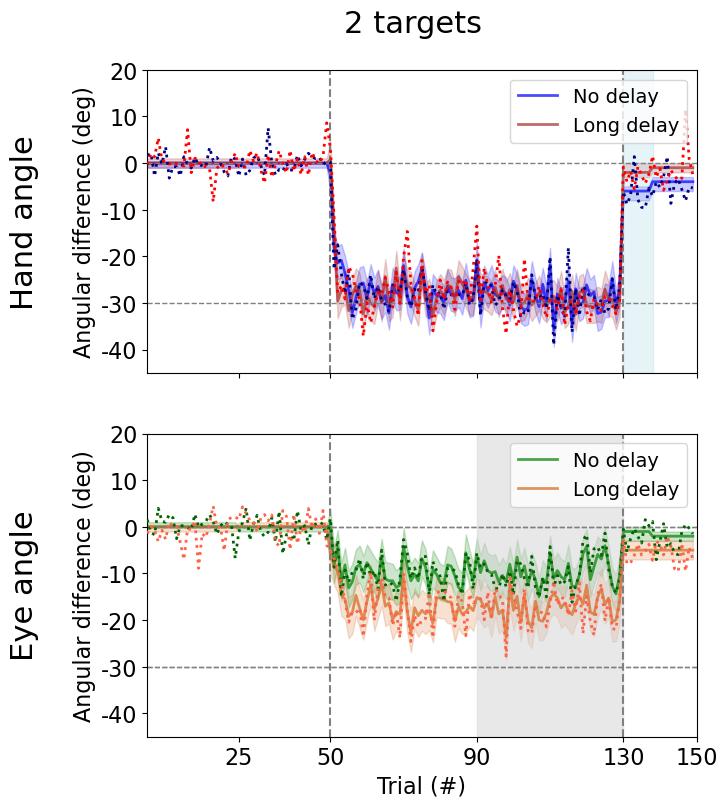

In [81]:
# 将厘米转换为英寸
width_cm = 18
height_cm = 22
width_inch = width_cm / 2.54
height_inch = height_cm / 2.54

# 画图
fig, axs = plt.subplots(2, 1, figsize=(width_inch, height_inch), sharex=True)

# 第一个子图 - 手部误差
ax = axs[0]
model_mean_gp0 = ax.plot(x_full, y_full_gp0_hand, color=handColors[0], linewidth=2, label='model mean (no delay)', zorder=2, alpha=0.7)
model_mean_gp1 = ax.plot(x_full, y_full_gp1_hand, color=handColors[1], linewidth=2, label='model mean (long delay)', zorder=2, alpha=0.7)
hdi_gp0 = ax.fill_between(x_full, hdi_full_gp0_hand_low, hdi_full_gp0_hand_high, color=handColors[0], alpha=0.2, zorder=1)
hdi_gp1 = ax.fill_between(x_full, hdi_full_gp1_hand_low, hdi_full_gp1_hand_high, color=handColors[1], alpha=0.2, zorder=1)
beh_mean_gp0 = ax.plot(x_full, gp0_mean_handError['handError'], color='navy', linewidth=2, linestyle=':', zorder=3, alpha=1)
beh_mean_gp1 = ax.plot(x_full, gp1_mean_handError['handError'], color='red', linewidth=2, linestyle=':', zorder=3, alpha=1)

ax.axvline(50, color='gray', linestyle='--')
ax.axvline(130, color='gray', linestyle='--')
ax.plot([0, 200], [0, 0], '--', linewidth=1, color='grey')
ax.plot([0, 200], [-30, -30], '--', linewidth=1, color='grey')

# 在x轴上绘制不同阶段的背景色
implicit_patch = patches.Patch(color='lightblue', alpha=0.3, label='Implicit Measurement')
ax.axvspan(130, 138, color='lightblue', alpha=0.3)  # implicit

ax.set_ylabel('Angular difference (deg)', fontsize=16)
ax.text(-0.25, 0.5, 'Hand angle', transform=ax.transAxes, fontsize=22, va='center', rotation='vertical')

ax.set_xticks([25, 50, 90, 130, 150])
ax.set_xticklabels([25, 50, 90, 130, 150],fontsize=16)  
ax.set_yticks(range(-40, 21, 10))
ax.set_yticklabels(np.arange(-40, 21, 10),fontsize=16)
ax.set_ylim(-45, 20)
ax.set_xlim(0, 150) 

ax.tick_params(axis='both', which='major', labelsize=16)

ax.legend([model_mean_gp0[0], model_mean_gp1[0]], 
          ['No delay', 'Long delay']
          , fontsize=14,loc='upper right')


# 第二个子图 - 眼部误差
ax = axs[1]
model_mean_gp0 = ax.plot(x_full, y_full_gp0_eye, color=eyeColors[0], linewidth=2, label='model mean (no delay)', zorder=2, alpha=0.7)
model_mean_gp1 = ax.plot(x_full, y_full_gp1_eye, color=eyeColors[1], linewidth=2, label='model mean (long delay)', zorder=2, alpha=0.7)
hdi_gp0 = ax.fill_between(x_full, hdi_full_gp0_eye_low, hdi_full_gp0_eye_high, color=eyeColors[0], alpha=0.2, zorder=1)
hdi_gp1 = ax.fill_between(x_full, hdi_full_gp1_eye_low, hdi_full_gp1_eye_high, color=eyeColors[1], alpha=0.2, zorder=1)
eye_mean_gp0 = ax.plot(x_full, gp0_mean_eyeError['eyeError'], color='darkgreen', linewidth=2, linestyle=':', zorder=3, alpha=1)
eye_mean_gp1 = ax.plot(x_full, gp1_mean_eyeError['eyeError'], color='tomato', linewidth=2, linestyle=':', zorder=3, alpha=1)

ax.axvline(50, color='gray', linestyle='--')
ax.axvline(130, color='gray', linestyle='--')
ax.plot([0, 200], [0, 0], '--', linewidth=1, color='grey')
ax.plot([0, 200], [-30, -30], '--', linewidth=1, color='grey')

ax.set_ylabel('Angular difference (deg)', fontsize=16)
ax.set_xlabel('Trial (#)', fontsize=16)
ax.text(-0.25, 0.5, 'Eye angle', transform=ax.transAxes, fontsize=22, va='center', rotation='vertical')

ax.plot([0, 150], [0, 0], '--', linewidth=1, color='grey')
ax.plot([0, 150], [-30, -30], '--', linewidth=1, color='grey')

# 在x轴上绘制不同阶段的背景色
eye_explicit_patch = patches.Patch(color='lightgrey', alpha=0.5, label='Eye Explicit Measurement')
ax.axvspan(90, 130, color='lightgrey', alpha=0.5)  # eye explicit

ax.set_xticks([25, 50, 90, 130, 150])
ax.set_xticklabels([25, 50, 90, 130, 150],fontsize=16)  
ax.set_yticks(range(-40, 21, 10))
ax.set_yticklabels(np.arange(-40, 21, 10),fontsize=16)
ax.set_ylim(-45, 20)
ax.set_xlim(0, 150)  
# 设置刻度标签大小
ax.tick_params(axis='both', which='major', labelsize=16)

ax.legend([model_mean_gp0[0], model_mean_gp1[0]], 
          ['No delay', 'Long delay']
          , fontsize=14,loc='upper right')

# 添加总标题
fig.suptitle('2 targets', fontsize=22, y=0.95)

# plt.tight_layout()
plt.show()

## 8 targets

### values

###############hand##########

In [82]:
sortedEpsBeh_8T['earlyBaseMeansAll'][0]

array([-1.57024769])

In [83]:
sortedEpsBeh_8T['earlyBaseHDIAll'][0]

array([[-2.61854349, -0.45571672]])

In [84]:
sortedEpsBeh_8T['lateBaseMeansAll'][0]

array([-0.14884016])

In [85]:
sortedEpsBeh_8T['lateBaseHDIAll'][0]

array([[-1.29766304,  0.91751709]])

In [86]:
sortedEpsBeh_8T['implicitMeansAll'][0]

array([-1.61425992])

In [87]:
sortedEpsBeh_8T['implicitHDIAll'][0]

array([[-3.46590959,  0.3323269 ]])

In [88]:
sortedEpsBeh_8T['afterMeansAll'][0]

array([-1.60874178])

In [89]:
sortedEpsBeh_8T['afterHDIAll'][0]

array([[-2.78262196, -0.49951493]])

In [90]:
sortedEpsBeh_8T['earlyBaseMeansAll'][1]

array([-0.99014681])

In [91]:
sortedEpsBeh_8T['earlyBaseHDIAll'][1]

array([[-2.26311613,  0.30651857]])

In [92]:
sortedEpsBeh_8T['lateBaseMeansAll'][1]

array([-0.08748372])

In [93]:
sortedEpsBeh_8T['lateBaseHDIAll'][1]

array([[-1.36799534,  1.1306958 ]])

In [94]:
sortedEpsBeh_8T['implicitMeansAll'][1]

array([-2.78263036])

In [95]:
sortedEpsBeh_8T['implicitHDIAll'][1]

array([[-4.88861344, -0.44925739]])

In [96]:
sortedEpsBeh_8T['afterMeansAll'][1]

array([-0.76797307])

In [97]:
sortedEpsBeh_8T['afterHDIAll'][1]

array([[-2.04809674,  0.57472475]])

############eye#################

In [98]:
sortedEpsEyes_8T['earlyBaseMeansAll'][0]

array([-0.56981])

In [99]:
sortedEpsEyes_8T['earlyBaseHDIAll'][0]

array([[-2.00006406,  0.81531081]])

In [100]:
sortedEpsEyes_8T['lateBaseMeansAll'][0]

array([0.72000447])

In [101]:
sortedEpsEyes_8T['lateBaseHDIAll'][0]

array([[-0.73104042,  2.11953418]])

In [102]:
sortedEpsEyes_8T['implicitMeansAll'][0]

array([0.31284012])

In [103]:
sortedEpsEyes_8T['implicitHDIAll'][0]

array([[-1.86774437,  2.58316007]])

In [104]:
sortedEpsEyes_8T['afterMeansAll'][0]

array([0.4045249])

In [105]:
sortedEpsEyes_8T['afterHDIAll'][0]

array([[-1.08645513,  1.85650709]])

In [106]:
sortedEpsEyes_8T['earlyBaseMeansAll'][1]

array([-1.59734958])

In [107]:
sortedEpsEyes_8T['earlyBaseHDIAll'][1]

array([[-2.99441525, -0.13263089]])

In [108]:
sortedEpsEyes_8T['lateBaseMeansAll'][1]

array([-0.35710385])

In [109]:
sortedEpsEyes_8T['lateBaseHDIAll'][1]

array([[-1.75209584,  1.08501647]])

In [110]:
sortedEpsEyes_8T['implicitMeansAll'][1]

array([-0.97105335])

In [111]:
sortedEpsEyes_8T['implicitHDIAll'][1]

array([[-3.15680119,  1.45010973]])

In [112]:
sortedEpsEyes_8T['afterMeansAll'][1]

array([-1.40554802])

In [113]:
sortedEpsEyes_8T['afterHDIAll'][1]

array([[-2.93398837,  0.14456013]])

### plot

In [114]:
# 获取手部和眼部误差均值
mean_handError = dataTable_8T.groupby(['trialNum', 'gp'])['handError'].mean().reset_index()
mean_eyeError = dataTable_8T.groupby(['trialNum', 'gp'])['eyeError'].mean().reset_index()

# 分别获取 gp 为 0 和 gp 为 1 时的均值
gp0_mean_handError = mean_handError[mean_handError['gp'] == 0]
gp1_mean_handError = mean_handError[mean_handError['gp'] == 1]
gp0_mean_eyeError = mean_eyeError[mean_eyeError['gp'] == 0].reset_index()
gp1_mean_eyeError = mean_eyeError[mean_eyeError['gp'] == 1].reset_index()

# 合并时间段数据
x_full = np.concatenate((np.arange(0, 25), np.arange(25, 50), np.arange(50, 170), np.arange(170, 178), np.arange(178, 200)))
y_full_gp0_hand = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_8T['earlyBaseMeansAll'][0]),
                                  np.full_like(np.arange(25, 50), sortedEpsBeh_8T['lateBaseMeansAll'][0]),
                                  sortedEpsBeh_8T['adaptMeansAll'][0],
                                  np.full_like(np.arange(170, 178), sortedEpsBeh_8T['implicitMeansAll'][0][0]),
                                  np.full_like(np.arange(178, 200), sortedEpsBeh_8T['afterMeansAll'][0][0])))
y_full_gp1_hand = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_8T['earlyBaseMeansAll'][1]),
                                  np.full_like(np.arange(25, 50), sortedEpsBeh_8T['lateBaseMeansAll'][1]),
                                  sortedEpsBeh_8T['adaptMeansAll'][1],
                                  np.full_like(np.arange(170, 178), sortedEpsBeh_8T['implicitMeansAll'][1][0]),
                                  np.full_like(np.arange(178, 200), sortedEpsBeh_8T['afterMeansAll'][1][0])))
y_full_gp0_eye = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_8T['earlyBaseMeansAll'][0]),
                                 np.full_like(np.arange(25, 50), sortedEpsEyes_8T['lateBaseMeansAll'][0]),
                                 sortedEpsEyes_8T['adaptMeansAll'][0],
                                 np.full_like(np.arange(170, 178), sortedEpsEyes_8T['implicitMeansAll'][0][0]),
                                 np.full_like(np.arange(178, 200), sortedEpsEyes_8T['afterMeansAll'][0][0])))
y_full_gp1_eye = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_8T['earlyBaseMeansAll'][1]),
                                 np.full_like(np.arange(25, 50), sortedEpsEyes_8T['lateBaseMeansAll'][1]),
                                 sortedEpsEyes_8T['adaptMeansAll'][1],
                                 np.full_like(np.arange(170, 178), sortedEpsEyes_8T['implicitMeansAll'][1][0]),
                                 np.full_like(np.arange(178, 200), sortedEpsEyes_8T['afterMeansAll'][1][0])))

# 合并HDI数据
hdi_full_gp0_hand_low = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_8T['earlyBaseHDIAll'][0][0, 0]),
                                        np.full_like(np.arange(25, 50), sortedEpsBeh_8T['lateBaseHDIAll'][0][0, 0]),
                                        sortedEpsBeh_8T['adaptHDIAll'][0][:, 0],
                                        np.full_like(np.arange(170, 178), sortedEpsBeh_8T['implicitHDIAll'][0][0, 0]),
                                        np.full_like(np.arange(178, 200), sortedEpsBeh_8T['afterHDIAll'][0][0, 0])))
hdi_full_gp0_hand_high = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_8T['earlyBaseHDIAll'][0][0, 1]),
                                         np.full_like(np.arange(25, 50), sortedEpsBeh_8T['lateBaseHDIAll'][0][0, 1]),
                                         sortedEpsBeh_8T['adaptHDIAll'][0][:, 1],
                                         np.full_like(np.arange(170, 178), sortedEpsBeh_8T['implicitHDIAll'][0][0, 1]),
                                         np.full_like(np.arange(178, 200), sortedEpsBeh_8T['afterHDIAll'][0][0, 1])))
hdi_full_gp1_hand_low = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_8T['earlyBaseHDIAll'][1][0, 0]),
                                        np.full_like(np.arange(25, 50), sortedEpsBeh_8T['lateBaseHDIAll'][1][0, 0]),
                                        sortedEpsBeh_8T['adaptHDIAll'][1][:, 0],
                                        np.full_like(np.arange(170, 178), sortedEpsBeh_8T['implicitHDIAll'][1][0, 0]),
                                        np.full_like(np.arange(178, 200), sortedEpsBeh_8T['afterHDIAll'][1][0, 0])))
hdi_full_gp1_hand_high = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsBeh_8T['earlyBaseHDIAll'][1][0, 1]),
                                         np.full_like(np.arange(25, 50), sortedEpsBeh_8T['lateBaseHDIAll'][1][0, 1]),
                                         sortedEpsBeh_8T['adaptHDIAll'][1][:, 1],
                                         np.full_like(np.arange(170, 178), sortedEpsBeh_8T['implicitHDIAll'][1][0, 1]),
                                         np.full_like(np.arange(178, 200), sortedEpsBeh_8T['afterHDIAll'][1][0, 1])))
hdi_full_gp0_eye_low = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_8T['earlyBaseHDIAll'][0][0, 0]),
                                       np.full_like(np.arange(25, 50), sortedEpsEyes_8T['lateBaseHDIAll'][0][0, 0]),
                                       sortedEpsEyes_8T['adaptHDIAll'][0][:, 0],
                                       np.full_like(np.arange(170, 178), sortedEpsEyes_8T['implicitHDIAll'][0][0, 0]),
                                       np.full_like(np.arange(178, 200), sortedEpsEyes_8T['afterHDIAll'][0][0, 0])))
hdi_full_gp0_eye_high = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_8T['earlyBaseHDIAll'][0][0, 1]),
                                        np.full_like(np.arange(25, 50), sortedEpsEyes_8T['lateBaseHDIAll'][0][0, 1]),
                                        sortedEpsEyes_8T['adaptHDIAll'][0][:, 1],
                                        np.full_like(np.arange(170, 178), sortedEpsEyes_8T['implicitHDIAll'][0][0, 1]),
                                        np.full_like(np.arange(178, 200), sortedEpsEyes_8T['afterHDIAll'][0][0, 1])))
hdi_full_gp1_eye_low = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_8T['earlyBaseHDIAll'][1][0, 0]),
                                       np.full_like(np.arange(25, 50), sortedEpsEyes_8T['lateBaseHDIAll'][1][0, 0]),
                                       sortedEpsEyes_8T['adaptHDIAll'][1][:, 0],
                                       np.full_like(np.arange(170, 178), sortedEpsEyes_8T['implicitHDIAll'][1][0, 0]),
                                       np.full_like(np.arange(178, 200), sortedEpsEyes_8T['afterHDIAll'][1][0, 0])))
hdi_full_gp1_eye_high = np.concatenate((np.full_like(np.arange(0, 25), sortedEpsEyes_8T['earlyBaseHDIAll'][1][0, 1]),
                                        np.full_like(np.arange(25, 50), sortedEpsEyes_8T['lateBaseHDIAll'][1][0, 1]),
                                        sortedEpsEyes_8T['adaptHDIAll'][1][:, 1],
                                        np.full_like(np.arange(170, 178), sortedEpsEyes_8T['implicitHDIAll'][1][0, 1]),
                                        np.full_like(np.arange(178, 200), sortedEpsEyes_8T['afterHDIAll'][1][0, 1])))

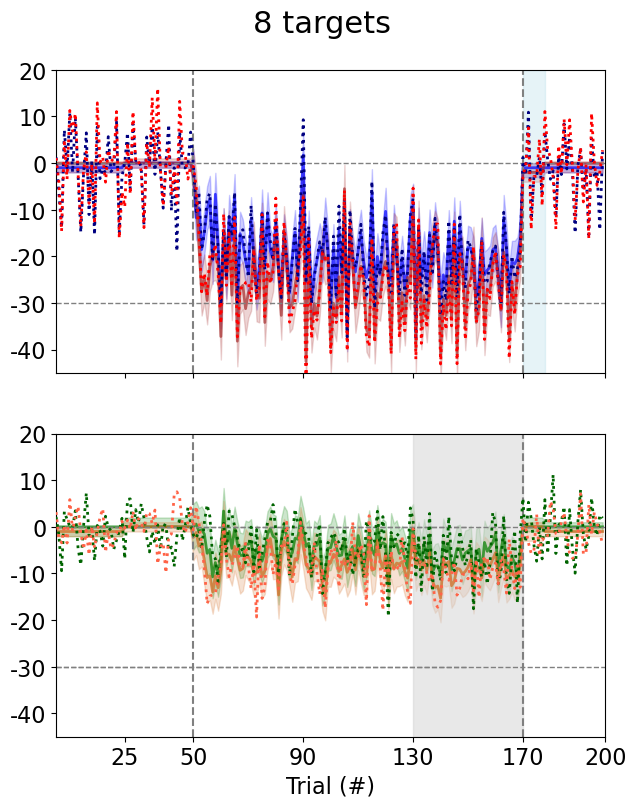

In [115]:
# 将厘米转换为英寸
width_cm = 18
height_cm = 22
width_inch = width_cm / 2.54
height_inch = height_cm / 2.54

# 画图
fig, axs = plt.subplots(2, 1, figsize=(width_inch, height_inch), sharex=True)

# 第一个子图 - 手部误差
ax = axs[0]
model_mean_gp0 = ax.plot(x_full, y_full_gp0_hand, color=handColors[0], linewidth=2, label='model mean (no delay)', zorder=2, alpha=0.7)
model_mean_gp1 = ax.plot(x_full, y_full_gp1_hand, color=handColors[1], linewidth=2, label='model mean (long delay)', zorder=2, alpha=0.7)
hdi_gp0 = ax.fill_between(x_full, hdi_full_gp0_hand_low, hdi_full_gp0_hand_high, color=handColors[0], alpha=0.2, zorder=1)
hdi_gp1 = ax.fill_between(x_full, hdi_full_gp1_hand_low, hdi_full_gp1_hand_high, color=handColors[1], alpha=0.2, zorder=1)
beh_mean_gp0 = ax.plot(x_full, gp0_mean_handError['handError'], color='navy', linewidth=2, linestyle=':', zorder=3, alpha=1)
beh_mean_gp1 = ax.plot(x_full, gp1_mean_handError['handError'], color='red', linewidth=2, linestyle=':', zorder=3, alpha=1)

ax.axvline(50, color='gray', linestyle='--')
ax.axvline(170, color='gray', linestyle='--')
ax.plot([0, 200], [0, 0], '--', linewidth=1, color='grey')
ax.plot([0, 200], [-30, -30], '--', linewidth=1, color='grey')

# 在x轴上绘制不同阶段的背景色
implicit_patch = patches.Patch(color='lightblue', alpha=0.3, label='Implicit Measurement')
ax.axvspan(170, 178, color='lightblue', alpha=0.3)  # implicit

# ax.set_ylabel('Angular difference (deg)', fontsize=16)
# ax.text(-0.25, 0.5, 'Hand error', transform=ax.transAxes, fontsize=22, va='center', rotation='vertical')

ax.set_xticks([25, 50, 90, 130, 170, 200])
ax.set_xticklabels([25, 50, 90, 130, 170, 200],fontsize=16)  
ax.set_yticks(range(-40, 21, 10))
ax.set_yticklabels(np.arange(-40, 21, 10),fontsize=16)
ax.set_ylim(-45, 20)
ax.set_xlim(0, 200) 

ax.tick_params(axis='both', which='major', labelsize=16)

# ax.legend([model_mean_gp0[0], model_mean_gp1[0]], 
#           ['No delay', 'Long delay']
#           , fontsize=14,loc='upper right')


# 第二个子图 - 眼部误差
ax = axs[1]
model_mean_gp0 = ax.plot(x_full, y_full_gp0_eye, color=eyeColors[0], linewidth=2, label='model mean (no delay)', zorder=2, alpha=0.7)
model_mean_gp1 = ax.plot(x_full, y_full_gp1_eye, color=eyeColors[1], linewidth=2, label='model mean (long delay)', zorder=2, alpha=0.7)
hdi_gp0 = ax.fill_between(x_full, hdi_full_gp0_eye_low, hdi_full_gp0_eye_high, color=eyeColors[0], alpha=0.2, zorder=1)
hdi_gp1 = ax.fill_between(x_full, hdi_full_gp1_eye_low, hdi_full_gp1_eye_high, color=eyeColors[1], alpha=0.2, zorder=1)
eye_mean_gp0 = ax.plot(x_full, gp0_mean_eyeError['eyeError'], color='darkgreen', linewidth=2, linestyle=':', zorder=3, alpha=1)
eye_mean_gp1 = ax.plot(x_full, gp1_mean_eyeError['eyeError'], color='tomato', linewidth=2, linestyle=':', zorder=3, alpha=1)

ax.axvline(50, color='gray', linestyle='--')
ax.axvline(170, color='gray', linestyle='--')
ax.plot([0, 200], [0, 0], '--', linewidth=1, color='grey')
ax.plot([0, 200], [-30, -30], '--', linewidth=1, color='grey')

# ax.set_ylabel('Angular difference (deg)', fontsize=16)
ax.set_xlabel('Trial (#)', fontsize=16)
# ax.text(-0.25, 0.5, 'Eye error', transform=ax.transAxes, fontsize=22, va='center', rotation='vertical')

ax.plot([0, 150], [0, 0], '--', linewidth=1, color='grey')
ax.plot([0, 150], [-30, -30], '--', linewidth=1, color='grey')

# 在x轴上绘制不同阶段的背景色
eye_explicit_patch = patches.Patch(color='lightgrey', alpha=0.5, label='Eye Explicit Measurement')
ax.axvspan(130, 170, color='lightgrey', alpha=0.5)  # eye explicit

ax.set_xticks([25, 50, 90, 130, 170, 200])
ax.set_xticklabels([25, 50, 90, 130, 170, 200],fontsize=16)  
ax.set_yticks(range(-40, 21, 10))
ax.set_yticklabels(np.arange(-40, 21, 10),fontsize=16)
ax.set_ylim(-45, 20)
ax.set_xlim(0, 200)  

ax.tick_params(axis='both', which='major', labelsize=16)

# ax.legend([model_mean_gp0[0], model_mean_gp1[0]], 
#           ['No delay', 'Long delay']
#           , fontsize=14,loc='upper right')

# 添加总标题
fig.suptitle('8 targets', fontsize=22, y=0.95)

# plt.tight_layout()
plt.show()

# Eye explicit and implicit

In [116]:
# 每个bar的颜色
colors_implicit = ['blue', 'blue', 'darkred', 'darkred']  
colors_explicit_eye = ['green', 'green', 'chocolate', 'chocolate']  
# data
categories = ['2targets-NoDelay', '8targets-NoDelay', '2targets-LongDelay', '8targets-LongDelay']
implicit = [-sortedEpsBeh_2T['implicitMeansAll'][0][0], -sortedEpsBeh_8T['implicitMeansAll'][0][0],
            -sortedEpsBeh_2T['implicitMeansAll'][1][0], -sortedEpsBeh_8T['implicitMeansAll'][1][0]]
explicit_eye = [-sortedEpsEyes_2T['adaptMeansAll'][0][-40:].mean(), -sortedEpsEyes_8T['adaptMeansAll'][0][-40:].mean(),
            -sortedEpsEyes_2T['adaptMeansAll'][1][-40:].mean(), -sortedEpsEyes_8T['adaptMeansAll'][1][-40:].mean()]
implicit_hdi = [-sortedEpsBeh_2T['implicitHDI'][0], -sortedEpsBeh_8T['implicitHDI'][0],
            -sortedEpsBeh_2T['implicitHDI'][1], -sortedEpsBeh_8T['implicitHDI'][1]]
explicit_eye_hdi = [az.hdi(np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][0], axis=(0,2)), hdi_prob=hdi_prob),
                        az.hdi(np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][0], axis=(0,2)), hdi_prob=hdi_prob),
                        az.hdi(np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][1], axis=(0,2)), hdi_prob=hdi_prob),
                        az.hdi(np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][1], axis=(0,2)), hdi_prob=hdi_prob)]
explicit_eye_hdi = [(-1 * arr)[::-1] for arr in explicit_eye_hdi]

In [117]:
# calc hdi of eye explicit for each subject

In [118]:
mean_lateadapt_samples_2T_0 = np.nanmean(sortedEpsEyes_2T['lastAdaptSubjSamples'][0], axis=2)

hdi_results  = []
# 计算每个受试者的 HDI
for i in range(mean_lateadapt_samples_2T_0.shape[0]):
    samples = mean_lateadapt_samples_2T_0[i]
    hdi = az.hdi(samples, hdi_prob=0.95)  # 95% HDI
    hdi_results.append(hdi)
# 将结果转换为指定格式的数组
eye_subjHDI_2T_0 = [np.array(hdi) for hdi in hdi_results]

In [119]:
mean_lateadapt_samples_2T_1 = np.nanmean(sortedEpsEyes_2T['lastAdaptSubjSamples'][1], axis=2)

hdi_results  = []
# 计算每个受试者的 HDI
for i in range(mean_lateadapt_samples_2T_1.shape[0]):
    samples = mean_lateadapt_samples_2T_1[i]
    hdi = az.hdi(samples, hdi_prob=0.95)  # 95% HDI
    hdi_results.append(hdi)
# 将结果转换为指定格式的数组
eye_subjHDI_2T_1 = [np.array(hdi) for hdi in hdi_results]

In [120]:
mean_lateadapt_samples_8T_0 = np.nanmean(sortedEpsEyes_8T['lastAdaptSubjSamples'][0], axis=2)

hdi_results  = []
# 计算每个受试者的 HDI
for i in range(mean_lateadapt_samples_8T_0.shape[0]):
    samples = mean_lateadapt_samples_8T_0[i]
    hdi = az.hdi(samples, hdi_prob=0.95)  # 95% HDI
    hdi_results.append(hdi)
# 将结果转换为指定格式的数组
eye_subjHDI_8T_0 = [np.array(hdi) for hdi in hdi_results]

In [121]:
mean_lateadapt_samples_8T_1 = np.nanmean(sortedEpsEyes_8T['lastAdaptSubjSamples'][1], axis=2)

hdi_results  = []
# 计算每个受试者的 HDI
for i in range(mean_lateadapt_samples_8T_1.shape[0]):
    samples = mean_lateadapt_samples_8T_1[i]
    hdi = az.hdi(samples, hdi_prob=0.95)  # 95% HDI
    hdi_results.append(hdi)
# 将结果转换为指定格式的数组
eye_subjHDI_8T_1 = [np.array(hdi) for hdi in hdi_results]

In [122]:
implicit_subjHDIs = [sortedEpsBeh_2T['implicitSubjHDI'][0], sortedEpsBeh_8T['implicitSubjHDI'][0],
                       sortedEpsBeh_2T['implicitSubjHDI'][1], sortedEpsBeh_8T['implicitSubjHDI'][1]]

eye_subjHDIs = [eye_subjHDI_2T_0, eye_subjHDI_8T_0,
                eye_subjHDI_2T_1, eye_subjHDI_8T_1]

In [123]:
# 将所有数乘以 -1 并交换位置
implicit_subjHDIs = [
    [np.array([array[0][::-1] * -1]) for array in group] for group in implicit_subjHDIs
]
eye_subjHDIs = [
    [np.array([array[::-1] * -1]) for array in group] for group in eye_subjHDIs
]

## Calc difference

In [124]:
### eye-hand difference

In [125]:
after_samples_2T_0 = sortedEpsBeh_2T['implicitSubjSamples'][0]
after_samples_2T_1 = sortedEpsBeh_2T['implicitSubjSamples'][1]
eyeExplicit_samples_2T_0 = np.nanmean(sortedEpsEyes_2T['lastAdaptSubjSamples'][0], axis=-1)
eyeExplicit_samples_2T_1 = np.nanmean(sortedEpsEyes_2T['lastAdaptSubjSamples'][1], axis=-1)

# 初始化一个空列表，用于存放转换后的数组
after_samples_flattened = []
# 遍历 after_samples0 中的每个数组
for arr in after_samples_2T_0:
    # 将每个数组展平为一维数组，并添加到列表中
    after_samples_flattened.append(arr.flatten())
# 将列表转换为 NumPy 数组
after_samples_2T_0 = np.array(after_samples_flattened)

# 初始化一个空列表，用于存放转换后的数组
after_samples_flattened = []
# 遍历 after_samples1 中的每个数组
for arr in after_samples_2T_1:
    # 将每个数组展平为一维数组，并添加到列表中
    after_samples_flattened.append(arr.flatten())
# 将列表转换为 NumPy 数组
after_samples_2T_1 = np.array(after_samples_flattened)

# Calculating the difference between aftereffect and eye explicit
diff_eyehand_2T_0 = [eyeExplicit_samples_2T_0[i] - after_samples_2T_0[i] for i in range(len(after_samples_2T_0))]
diff_eyehand_samples_2T_0 = np.mean(diff_eyehand_2T_0,axis=0)
diff_eyehand_2T_1 = [eyeExplicit_samples_2T_1[i] - after_samples_2T_1[i] for i in range(len(after_samples_2T_1))]
diff_eyehand_samples_2T_1 = np.mean(diff_eyehand_2T_1,axis=0)

# Calculate mean for each subject
diff_mean_2T_0 = np.mean(diff_eyehand_samples_2T_0)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_mean_2T_0 = az.hdi(diff_eyehand_samples_2T_0, hdi_prob=hdi_prob)
# Calculate mean for each subject
diff_mean_2T_1 = np.mean(diff_eyehand_samples_2T_1)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_mean_2T_1 = az.hdi(diff_eyehand_samples_2T_1, hdi_prob=hdi_prob)

In [126]:
after_samples_8T_0 = sortedEpsBeh_8T['implicitSubjSamples'][0]
after_samples_8T_1 = sortedEpsBeh_8T['implicitSubjSamples'][1]
eyeExplicit_samples_8T_0 = np.nanmean(sortedEpsEyes_8T['lastAdaptSubjSamples'][0], axis=-1)
eyeExplicit_samples_8T_1 = np.nanmean(sortedEpsEyes_8T['lastAdaptSubjSamples'][1], axis=-1)

# 初始化一个空列表，用于存放转换后的数组
after_samples_flattened = []
# 遍历 after_samples0 中的每个数组
for arr in after_samples_8T_0:
    # 将每个数组展平为一维数组，并添加到列表中
    after_samples_flattened.append(arr.flatten())
# 将列表转换为 NumPy 数组
after_samples_8T_0 = np.array(after_samples_flattened)

# 初始化一个空列表，用于存放转换后的数组
after_samples_flattened = []
# 遍历 after_samples1 中的每个数组
for arr in after_samples_8T_1:
    # 将每个数组展平为一维数组，并添加到列表中
    after_samples_flattened.append(arr.flatten())
# 将列表转换为 NumPy 数组
after_samples_8T_1 = np.array(after_samples_flattened)

# Calculating the difference between aftereffect and eye explicit
diff_eyehand_8T_0 = [eyeExplicit_samples_8T_0[i] - after_samples_8T_0[i] for i in range(len(after_samples_8T_0))]
diff_eyehand_samples_8T_0 = np.mean(diff_eyehand_8T_0,axis=0)
diff_eyehand_8T_1 = [eyeExplicit_samples_8T_1[i] - after_samples_8T_1[i] for i in range(len(after_samples_8T_1))]
diff_eyehand_samples_8T_1 = np.mean(diff_eyehand_8T_1,axis=0)

# Calculate mean for each subject
diff_mean_8T_0 = np.mean(diff_eyehand_samples_8T_0)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_mean_8T_0 = az.hdi(diff_eyehand_samples_8T_0, hdi_prob=hdi_prob)
# Calculate mean for each subject
diff_mean_8T_1 = np.mean(diff_eyehand_samples_8T_1)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_mean_8T_1 = az.hdi(diff_eyehand_samples_8T_1, hdi_prob=hdi_prob)

In [127]:
diff_eyehand_mean = [-diff_mean_2T_0, -diff_mean_8T_0, -diff_mean_2T_1, -diff_mean_8T_1]
diff_eyehand_mean_hdi = [-hdi_diff_mean_2T_0, -hdi_diff_mean_8T_0, -hdi_diff_mean_2T_1, -hdi_diff_mean_8T_1]

In [128]:
### Eye difference across delays

In [129]:
# Calculating the difference between eye explicit
diff_eye_samples_2T = np.mean(eyeExplicit_samples_2T_0,axis=0) - np.mean(eyeExplicit_samples_2T_1,axis=0)
diff_eye_samples_8T = np.mean(eyeExplicit_samples_8T_0,axis=0) - np.mean(eyeExplicit_samples_8T_1,axis=0)

# Calculate mean for each subject
diff_eye_2T = np.mean(diff_eye_samples_2T)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_eye_2T = az.hdi(diff_eye_samples_2T, hdi_prob=hdi_prob)
# Calculate mean for each subject
diff_eye_8T = np.mean(diff_eye_samples_8T)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_eye_8T = az.hdi(diff_eye_samples_8T, hdi_prob=hdi_prob)

diff_eyes = [-diff_eye_2T, -diff_eye_8T]
diff_eyes_hdi = [-hdi_diff_eye_2T, -hdi_diff_eye_8T]

In [130]:
### Eye difference across experiment

In [131]:
# Calculating the difference between eye explicit
diff_eye_samples_0 = np.mean(eyeExplicit_samples_2T_0,axis=0) - np.mean(eyeExplicit_samples_8T_0,axis=0)
diff_eye_samples_1 = np.mean(eyeExplicit_samples_2T_1,axis=0) - np.mean(eyeExplicit_samples_8T_1,axis=0)

# Calculate mean for each subject
diff_eye_0 = np.mean(diff_eye_samples_0)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_eye_0 = az.hdi(diff_eye_samples_0, hdi_prob=hdi_prob)
# Calculate mean for each subject
diff_eye_1 = np.mean(diff_eye_samples_1)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_eye_1 = az.hdi(diff_eye_samples_1, hdi_prob=hdi_prob)

diff_eyes = [-diff_eye_0, -diff_eye_1]
diff_eyes_hdi = [-hdi_diff_eye_0, -hdi_diff_eye_1]

In [132]:
### aftereffect difference across delays

In [133]:
# Calculating the difference between eye explicit
diff_hand_samples_2T = np.mean(after_samples_2T_0,axis=0) - np.mean(after_samples_2T_1,axis=0)
diff_hand_samples_8T = np.mean(after_samples_8T_0,axis=0) - np.mean(after_samples_8T_1,axis=0)

# Calculate mean for each subject
diff_hand_2T = np.mean(diff_hand_samples_2T)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_hand_2T = az.hdi(diff_hand_samples_2T, hdi_prob=hdi_prob)
# Calculate mean for each subject
diff_hand_8T = np.mean(diff_hand_samples_8T)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_hand_8T = az.hdi(diff_hand_samples_8T, hdi_prob=hdi_prob)

diff_hands = [-diff_hand_2T, -diff_hand_8T]
diff_hands_hdi = [-hdi_diff_hand_2T, -hdi_diff_hand_8T]

In [134]:
### aftereffect difference across experiments

In [135]:
# Calculating the difference between eye explicit
diff_hand_samples_0 = np.mean(after_samples_2T_0,axis=0) - np.mean(after_samples_8T_0,axis=0)
diff_hand_samples_1 = np.mean(after_samples_2T_1,axis=0) - np.mean(after_samples_8T_1,axis=0)

# Calculate mean for each subject
diff_hand_0 = np.mean(diff_hand_samples_0)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_hand_0 = az.hdi(diff_hand_samples_0, hdi_prob=hdi_prob)
# Calculate mean for each subject
diff_hand_1 = np.mean(diff_hand_samples_1)
# Calculate HDI using Arviz for all subjects combined
hdi_diff_hand_1 = az.hdi(diff_hand_samples_1, hdi_prob=hdi_prob)

diff_hands = [-diff_hand_0, -diff_hand_1]
diff_hands_hdi = [-hdi_diff_hand_0, -hdi_diff_hand_1]

# figure5: target effect and delay effect

In [136]:
# 每个bar的颜色
colors_implicit = ['blue', 'blue', 'darkred', 'darkred']  
colors_explicit_eye = ['green', 'green', 'chocolate', 'chocolate']  
# data
categories = ['2targets-NoDelay', '8targets-NoDelay', '2targets-LongDelay', '8targets-LongDelay']
implicit = [-sortedEpsBeh_2T['implicitMeansAll'][0][0], -sortedEpsBeh_8T['implicitMeansAll'][0][0],
            -sortedEpsBeh_2T['implicitMeansAll'][1][0], -sortedEpsBeh_8T['implicitMeansAll'][1][0]]
explicit_eye = [-sortedEpsEyes_2T['adaptMeansAll'][0][-40:].mean(), -sortedEpsEyes_8T['adaptMeansAll'][0][-40:].mean(),
            -sortedEpsEyes_2T['adaptMeansAll'][1][-40:].mean(), -sortedEpsEyes_8T['adaptMeansAll'][1][-40:].mean()]
implicit_hdi = [-sortedEpsBeh_2T['implicitHDI'][0], -sortedEpsBeh_8T['implicitHDI'][0],
            -sortedEpsBeh_2T['implicitHDI'][1], -sortedEpsBeh_8T['implicitHDI'][1]]
explicit_eye_hdi = [az.hdi(np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][0], axis=(0,2)), hdi_prob=hdi_prob),
                        az.hdi(np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][0], axis=(0,2)), hdi_prob=hdi_prob),
                        az.hdi(np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][1], axis=(0,2)), hdi_prob=hdi_prob),
                        az.hdi(np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][1], axis=(0,2)), hdi_prob=hdi_prob)]
explicit_eye_hdi = [(-1 * arr)[::-1] for arr in explicit_eye_hdi]

In [137]:
implicit_subjHDIs = [sortedEpsBeh_2T['implicitSubjHDI'][0], sortedEpsBeh_8T['implicitSubjHDI'][0],
                       sortedEpsBeh_2T['implicitSubjHDI'][1], sortedEpsBeh_8T['implicitSubjHDI'][1]]

eye_subjHDIs = [eye_subjHDI_2T_0, eye_subjHDI_8T_0,
                eye_subjHDI_2T_1, eye_subjHDI_8T_1]

# 将所有数乘以 -1 并交换位置
implicit_subjHDIs = [
    [np.array([array[0][::-1] * -1]) for array in group] for group in implicit_subjHDIs
]
eye_subjHDIs = [
    [np.array([array[::-1] * -1]) for array in group] for group in eye_subjHDIs
]

## excess = 30-(implicit + explicit)

In [138]:
total_learn_samples_2T_0 = np.nanmean(sortedEpsBeh_2T['lastAdaptSubjSamples'][0], axis=2)
total_learn_samples_2T_1 = np.nanmean(sortedEpsBeh_2T['lastAdaptSubjSamples'][1], axis=2)
total_learn_samples_8T_0 = np.nanmean(sortedEpsBeh_8T['lastAdaptSubjSamples'][0], axis=2)
total_learn_samples_8T_1 = np.nanmean(sortedEpsBeh_8T['lastAdaptSubjSamples'][1], axis=2)

In [139]:
subj_samples_excess_2T_0  = -total_learn_samples_2T_0-(-after_samples_2T_0 - eyeExplicit_samples_2T_0)
subj_samples_excess_2T_1  = -total_learn_samples_2T_1-(-after_samples_2T_1 - eyeExplicit_samples_2T_1)
subj_samples_excess_8T_0  = -total_learn_samples_8T_0-(-after_samples_8T_0 - eyeExplicit_samples_8T_0)
subj_samples_excess_8T_1  = -total_learn_samples_8T_1-(-after_samples_8T_1 - eyeExplicit_samples_8T_1)

In [140]:
np.nanmean(total_learn_samples_2T_0)

-28.54683895709069

In [141]:
az.hdi(np.nanmean(total_learn_samples_2T_0, axis=0), hdi_prob=hdi_prob)

array([-29.44446144, -27.65856927])

In [142]:
np.nanmean(total_learn_samples_2T_1)

-28.962721504969913

In [143]:
az.hdi(np.nanmean(total_learn_samples_2T_1, axis=0), hdi_prob=hdi_prob)

array([-29.99531416, -27.91470734])

In [144]:
np.nanmean(total_learn_samples_8T_0)

-20.840197664434747

In [145]:
az.hdi(np.nanmean(total_learn_samples_8T_0, axis=0), hdi_prob=hdi_prob)

array([-21.67471317, -20.05463379])

In [146]:
np.nanmean(total_learn_samples_8T_1)

-26.20952762266432

In [147]:
az.hdi(np.nanmean(total_learn_samples_8T_1, axis=0), hdi_prob=hdi_prob)

array([-27.08618322, -25.31723391])

In [148]:
def compute_hdi(samples, hdi_prob=0.95):
    hdi_interval = az.hdi(samples, hdi_prob=hdi_prob)
    return hdi_interval

# 计算每个subject的HDI
subj_hdi_excess_2T_0 = []
for subj_samples in subj_samples_excess_2T_0:
    hdi_interval = compute_hdi(subj_samples)
    subj_hdi_excess_2T_0.append(hdi_interval)
    
subj_hdi_excess_2T_1 = []
for subj_samples in subj_samples_excess_2T_1:
    hdi_interval = compute_hdi(subj_samples)
    subj_hdi_excess_2T_1.append(hdi_interval)
    
subj_hdi_excess_8T_0 = []
for subj_samples in subj_samples_excess_8T_0:
    hdi_interval = compute_hdi(subj_samples)
    subj_hdi_excess_8T_0.append(hdi_interval)
    
subj_hdi_excess_8T_1 = []
for subj_samples in subj_samples_excess_8T_1:
    hdi_interval = compute_hdi(subj_samples)
    subj_hdi_excess_8T_1.append(hdi_interval)

In [149]:
mu_ND_2T_excess =  -sortedEpsBeh_2T['adaptMeansAll'][0][-40:].mean() - (-sortedEpsBeh_2T['implicitMeansAll'][0][0]-sortedEpsEyes_2T['adaptMeansAll'][0][-40:].mean())
samples_ND_2T_excess = np.nanmean(subj_samples_excess_2T_0, axis=0)
hdi_ND_2T_excess = az.hdi(samples_ND_2T_excess, hdi_prob=hdi_prob)

mu_LD_2T_excess =  -sortedEpsBeh_2T['adaptMeansAll'][1][-40:].mean() - (-sortedEpsBeh_2T['implicitMeansAll'][1][0]-sortedEpsEyes_2T['adaptMeansAll'][1][-40:].mean())
samples_LD_2T_excess = np.nanmean(subj_samples_excess_2T_1, axis=0)
hdi_LD_2T_excess = az.hdi(samples_LD_2T_excess, hdi_prob=hdi_prob)

mu_ND_8T_excess =  -sortedEpsBeh_8T['adaptMeansAll'][0][-40:].mean() - (-sortedEpsBeh_8T['implicitMeansAll'][0][0]-sortedEpsEyes_8T['adaptMeansAll'][0][-40:].mean())
samples_ND_8T_excess = np.nanmean(subj_samples_excess_8T_0, axis=0)
hdi_ND_8T_excess = az.hdi(samples_ND_8T_excess, hdi_prob=hdi_prob)

mu_LD_8T_excess =  -sortedEpsBeh_8T['adaptMeansAll'][1][-40:].mean() - (-sortedEpsBeh_8T['implicitMeansAll'][1][0]-sortedEpsEyes_8T['adaptMeansAll'][1][-40:].mean()) 
samples_LD_8T_excess = np.nanmean(subj_samples_excess_8T_1, axis=0)
hdi_LD_8T_excess = az.hdi(samples_LD_8T_excess, hdi_prob=hdi_prob)

In [150]:
mu_ND_2T_excess

11.951120981458761

In [151]:
hdi_ND_2T_excess

array([ 8.92866718, 14.85618638])

In [152]:
mu_ND_8T_excess

13.171580494696869

In [153]:
hdi_ND_8T_excess

array([10.71618415, 15.94581335])

In [154]:
mu_LD_2T_excess

9.806880929237977

In [155]:
hdi_LD_2T_excess

array([ 6.46078482, 12.38269752])

In [156]:
mu_LD_8T_excess

14.305105830112089

In [157]:
hdi_LD_8T_excess

array([11.66462377, 17.1918321 ])

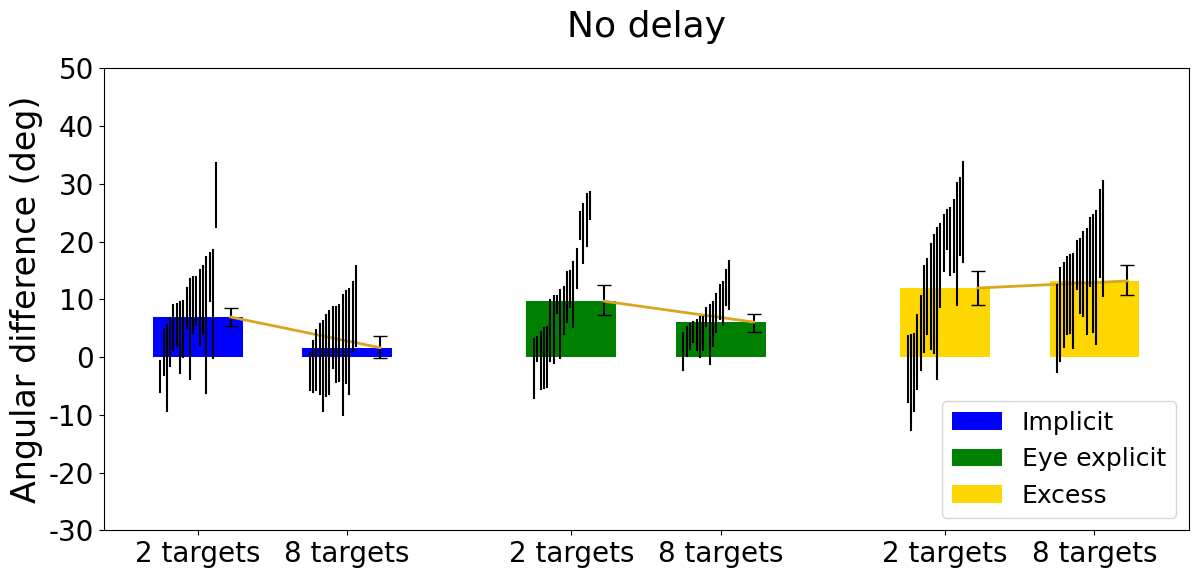

In [158]:
# Target effect - no delay
# data
categories = ['2targets-im', '8targets-im', '2targets-ex', '8targets-ex']

implicit = [-sortedEpsBeh_2T['implicitMeansAll'][0][0], -sortedEpsBeh_8T['implicitMeansAll'][0][0]]
explicit_eye = [-sortedEpsEyes_2T['adaptMeansAll'][0][-40:].mean(), -sortedEpsEyes_8T['adaptMeansAll'][0][-40:].mean()]

implicit_hdi = [-sortedEpsBeh_2T['implicitHDI'][0], -sortedEpsBeh_8T['implicitHDI'][0]]
explicit_eye_hdi = [az.hdi(np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][0], axis=(0,2)), hdi_prob=hdi_prob),
                        az.hdi(np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][0], axis=(0,2)), hdi_prob=hdi_prob)]

implicit_subjHDIs = [sortedEpsBeh_2T['implicitSubjHDI'][0], sortedEpsBeh_8T['implicitSubjHDI'][0]]

eye_subjHDIs = [eye_subjHDI_2T_0, eye_subjHDI_8T_0]

# 将所有数乘以 -1 并交换位置
explicit_eye_hdi = [(-1 * arr)[::-1] for arr in explicit_eye_hdi]
implicit_subjHDIs = [
    [np.array([array[0][::-1] * -1]) for array in group] for group in implicit_subjHDIs
]
eye_subjHDIs = [
    [np.array([array[::-1] * -1]) for array in group] for group in eye_subjHDIs
]

##################################################### plot
# bar width
bar_width = 0.6

fig, ax = plt.subplots(figsize=(14, 6))
bar1 = ax.bar(0, implicit[0], bar_width, color='blue') 
bar2 = ax.bar(1, implicit[1], bar_width, color='blue') 
bar3 = ax.bar(2.5, explicit_eye[0], bar_width, color='g') 
bar4 = ax.bar(3.5, explicit_eye[1], bar_width, color='g') 
bar5 = ax.bar(5, mu_ND_2T_excess, bar_width, color='gold') 
bar6 = ax.bar(6, mu_ND_8T_excess, bar_width, color='gold') 

# add errorbar for implicit
for i in range(2):
    lower_error = implicit_hdi[i][0]
    upper_error = implicit_hdi[i][1]
    ax.errorbar(i + 0.22, implicit[i], yerr=[[abs(lower_error)], [abs(upper_error)]], fmt='none', ecolor='black', capsize=5)
    
# add errorbar for explicit eye
for i in range(2):
    lower_error = explicit_eye_hdi[i][0]
    upper_error = explicit_eye_hdi[i][1]
    ax.errorbar(i + 2.5 + 0.22, explicit_eye[i], yerr=[[abs(explicit_eye[i]-lower_error)], [abs(explicit_eye[i]-upper_error)]], fmt='none', ecolor='black', capsize=5)

# add errorbar for excess
lower_error = hdi_ND_2T_excess[0]
upper_error = hdi_ND_2T_excess[1]
ax.errorbar(5 + 0.22, mu_ND_2T_excess, yerr=[[abs(lower_error-mu_ND_2T_excess)], [abs(upper_error-mu_ND_2T_excess)]], fmt='none', ecolor='black', capsize=5)
lower_error = hdi_ND_8T_excess[0]
upper_error = hdi_ND_8T_excess[1]
ax.errorbar(6 + 0.22, mu_ND_8T_excess, yerr=[[abs(lower_error-mu_ND_8T_excess)], [abs(upper_error-mu_ND_8T_excess)]], fmt='none', ecolor='black', capsize=5)

# Connecting lines
plt.plot([0 + 0.22, 1 + 0.22], [implicit[0], implicit[1]], color='goldenrod', linestyle='-', linewidth=2)
plt.plot([2.5 + 0.22, 3.5 + 0.22], [explicit_eye[0], explicit_eye[1]], color='goldenrod', linestyle='-', linewidth=2)
plt.plot([5 + 0.22, 6 + 0.22], [mu_ND_2T_excess, mu_ND_8T_excess], color='goldenrod', linestyle='-', linewidth=2)

# Add HDI lines for each subject for implicit
for group_idx, hdi_group in enumerate(implicit_subjHDIs):
    sorted_hdis = sorted(hdi_group, key=lambda x: x[0][1])  # Sort by the lower bound of HDI
    for subj_idx, hdi in enumerate(sorted_hdis):
        lower, upper = hdi[0]
        ax.plot([group_idx - 0.25 + subj_idx * 0.022, group_idx - 0.25 + subj_idx * 0.022], [lower, upper], color='black')
        
# Add HDI lines for each subject for explicit eye
for group_idx, hdi_group in enumerate(eye_subjHDIs):
    sorted_hdis = sorted(hdi_group, key=lambda x: x[0][1])  # Sort by the lower bound of HDI
    for subj_idx, hdi in enumerate(sorted_hdis):
        lower, upper = hdi[0]
        ax.plot([group_idx - 0.25 + subj_idx * 0.022 + 2.5, group_idx - 0.25 + subj_idx * 0.022 + 2.5], 
                [lower, upper], color='black')

# Add HDI lines for each subject for excess
sorted_hdi = sorted(subj_hdi_excess_2T_0, key=lambda x: x[1])
for subj_idx, hdi in enumerate(sorted_hdi):
    lower, upper = hdi
    ax.plot([0 - 0.25 + subj_idx * 0.022 + 5, 0 - 0.25 + subj_idx * 0.022 + 5], [lower, upper], color='black')
sorted_hdi = sorted(subj_hdi_excess_8T_0, key=lambda x: x[1])
for subj_idx, hdi in enumerate(sorted_hdi):
    lower, upper = hdi
    ax.plot([0 - 0.25 + subj_idx * 0.022 + 6, 0 - 0.25 + subj_idx * 0.022 + 6], [lower, upper], color='black')
       
 # x label
ax.set_xticks([0, 1, 2.5, 3.5, 5, 6])
# ax.set_xticklabels(categories,fontsize=15)
ax.set_xticklabels(['2 targets',
                    '8 targets', 
                    '2 targets',                    
                    '8 targets',
                    '2 targets',                    
                    '8 targets'],fontsize=20)
ax.set_yticks(np.arange(-30, 52, 10))
ax.set_yticklabels(np.arange(-30, 52, 10),fontsize=20)
ax.set_ylim(-30,50)

# 创建自定义图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='Implicit'),
    Patch(facecolor='g', label='Eye explicit'),
    Patch(facecolor='gold', label='Excess')
]

ax.legend(handles=legend_elements, loc='lower right', fontsize=18)

# # Adding sub-labels for conditions
# ax.text(1.8, -42, 'No delay', ha='center', fontsize=16)

plt.ylabel('Angular difference (deg)',fontsize=24)
plt.title('No delay',fontsize=26, y=1.05)
plt.show()

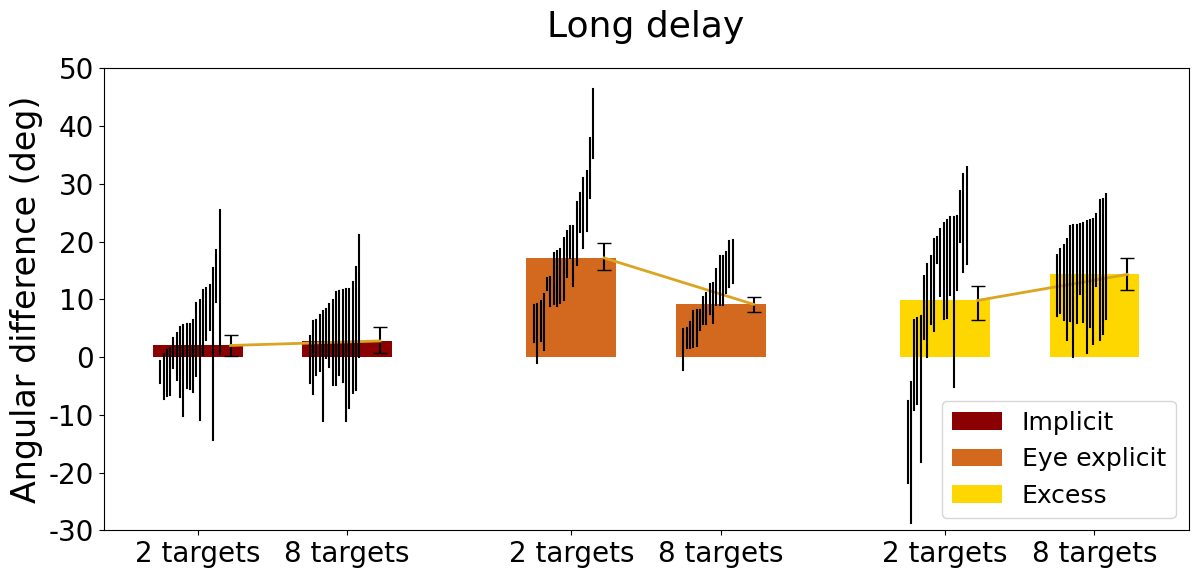

In [159]:
# Target effect - long delay
# data
categories = ['2targets-im', '8targets-im', '2targets-ex', '8targets-ex']

implicit = [-sortedEpsBeh_2T['implicitMeansAll'][1][0], -sortedEpsBeh_8T['implicitMeansAll'][1][0]]
explicit_eye = [-sortedEpsEyes_2T['adaptMeansAll'][1][-40:].mean(), -sortedEpsEyes_8T['adaptMeansAll'][1][-40:].mean()]

implicit_hdi = [-sortedEpsBeh_2T['implicitHDI'][1], -sortedEpsBeh_8T['implicitHDI'][1]]
explicit_eye_hdi = [az.hdi(np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][1], axis=(0,2)), hdi_prob=hdi_prob),
                        az.hdi(np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][1], axis=(0,2)), hdi_prob=hdi_prob)]

implicit_subjHDIs = [sortedEpsBeh_2T['implicitSubjHDI'][1], sortedEpsBeh_8T['implicitSubjHDI'][1]]
eye_subjHDIs = [eye_subjHDI_2T_1, eye_subjHDI_8T_1]

# 将所有数乘以 -1 并交换位置
explicit_eye_hdi = [(-1 * arr)[::-1] for arr in explicit_eye_hdi]
implicit_subjHDIs = [
    [np.array([array[0][::-1] * -1]) for array in group] for group in implicit_subjHDIs
]
eye_subjHDIs = [
    [np.array([array[::-1] * -1]) for array in group] for group in eye_subjHDIs
]

############################################################# plot
# bar width
bar_width = 0.6

fig, ax = plt.subplots(figsize=(14, 6))
bar1 = ax.bar(0, implicit[0], bar_width, color='darkred') 
bar2 = ax.bar(1, implicit[1], bar_width, color='darkred') 
bar3 = ax.bar(2.5, explicit_eye[0], bar_width, color='chocolate') 
bar4 = ax.bar(3.5, explicit_eye[1], bar_width, color='chocolate') 
bar5 = ax.bar(5, mu_LD_2T_excess, bar_width, color='gold') 
bar6 = ax.bar(6, mu_LD_8T_excess, bar_width, color='gold') 

# add errorbar for implicit
for i in range(2):
    lower_error = implicit_hdi[i][0]
    upper_error = implicit_hdi[i][1]
    ax.errorbar(i + 0.22, implicit[i], yerr=[[abs(lower_error)], [abs(upper_error)]], fmt='none', ecolor='black', capsize=5)
    
# add errorbar for explicit eye
for i in range(2):
    lower_error = explicit_eye_hdi[i][0]
    upper_error = explicit_eye_hdi[i][1]
    ax.errorbar(i + 2.5 + 0.22, explicit_eye[i], yerr=[[abs(explicit_eye[i]-lower_error)], [abs(explicit_eye[i]-upper_error)]], fmt='none', ecolor='black', capsize=5)

# add errorbar for excess
lower_error = hdi_LD_2T_excess[0]
upper_error = hdi_LD_2T_excess[1]
ax.errorbar(5 + 0.22, mu_LD_2T_excess, yerr=[[abs(lower_error-mu_LD_2T_excess)], [abs(upper_error-mu_LD_2T_excess)]], fmt='none', ecolor='black', capsize=5)
lower_error = hdi_LD_8T_excess[0]
upper_error = hdi_LD_8T_excess[1]
ax.errorbar(6 + 0.22, mu_LD_8T_excess, yerr=[[abs(lower_error-mu_LD_8T_excess)], [abs(upper_error-mu_LD_8T_excess)]], fmt='none', ecolor='black', capsize=5)

# Connecting lines
plt.plot([0 + 0.22, 1 + 0.22], [implicit[0], implicit[1]], color='goldenrod', linestyle='-', linewidth=2)
plt.plot([2.5 + 0.22, 3.5 + 0.22], [explicit_eye[0], explicit_eye[1]], color='goldenrod', linestyle='-', linewidth=2)
plt.plot([5 + 0.22, 6 + 0.22], [mu_LD_2T_excess, mu_LD_8T_excess], color='goldenrod', linestyle='-', linewidth=2)

# Add HDI lines for each subject for implicit
for group_idx, hdi_group in enumerate(implicit_subjHDIs):
    sorted_hdis = sorted(hdi_group, key=lambda x: x[0][1])  # Sort by the lower bound of HDI
    for subj_idx, hdi in enumerate(sorted_hdis):
        lower, upper = hdi[0]
        ax.plot([group_idx - 0.25 + subj_idx * 0.022, group_idx - 0.25 + subj_idx * 0.022], [lower, upper], color='black')
        
# Add HDI lines for each subject for explicit eye
for group_idx, hdi_group in enumerate(eye_subjHDIs):
    sorted_hdis = sorted(hdi_group, key=lambda x: x[0][1])  # Sort by the lower bound of HDI
    for subj_idx, hdi in enumerate(sorted_hdis):
        lower, upper = hdi[0]
        ax.plot([group_idx - 0.25 + subj_idx * 0.022 + 2.5, group_idx - 0.25 + subj_idx * 0.022 + 2.5], 
                [lower, upper], color='black')

# Add HDI lines for each subject for excess
sorted_hdi = sorted(subj_hdi_excess_2T_1, key=lambda x: x[1])
for subj_idx, hdi in enumerate(sorted_hdi):
    lower, upper = hdi
    ax.plot([0 - 0.25 + subj_idx * 0.022 + 5, 0 - 0.25 + subj_idx * 0.022 + 5], [lower, upper], color='black')
sorted_hdi = sorted(subj_hdi_excess_8T_1, key=lambda x: x[1])
for subj_idx, hdi in enumerate(sorted_hdi):
    lower, upper = hdi
    ax.plot([0 - 0.25 + subj_idx * 0.022 + 6, 0 - 0.25 + subj_idx * 0.022 + 6], [lower, upper], color='black')
    
 # x label
ax.set_xticks([0, 1, 2.5, 3.5, 5, 6])
# ax.set_xticklabels(categories,fontsize=15)
ax.set_xticklabels(['2 targets',
                    '8 targets', 
                    '2 targets',                    
                    '8 targets',
                    '2 targets',                    
                    '8 targets'],fontsize=20)
ax.set_yticks(np.arange(-30, 52, 10))
ax.set_yticklabels(np.arange(-30, 52, 10),fontsize=20)
ax.set_ylim(-30,50)

# 创建自定义图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='darkred', label='Implicit'),
    Patch(facecolor='chocolate', label='Eye explicit'),
    Patch(facecolor='gold', label='Excess')
]

ax.legend(handles=legend_elements, loc='lower right', fontsize=18)

# # Adding sub-labels for conditions
# ax.text(1.8, -42, 'No delay', ha='center', fontsize=16)

plt.ylabel('Angular difference (deg)',fontsize=24)
plt.title('Long delay',fontsize=26, y=1.05)
plt.show()

## difference of three measures between groups and experiments

### Δ implicit

In [160]:
#### between experiments

In [161]:
# no-delay
delta_im_ND = sortedEpsBeh_8T['implicitMeansAll'][0] - sortedEpsBeh_2T['implicitMeansAll'][0]
delta_im_ND_hdi = az.hdi(sortedEpsBeh_8T['implicitSamples'][0].flatten() - 
                         sortedEpsBeh_2T['implicitSamples'][0].flatten(), 
                         hdi_prob=hdi_prob)

In [162]:
# long-delay
delta_im_LD = sortedEpsBeh_8T['implicitMeansAll'][1] - sortedEpsBeh_2T['implicitMeansAll'][1]
delta_im_LD_hdi = az.hdi(sortedEpsBeh_8T['implicitSamples'][1].flatten() -
                         sortedEpsBeh_2T['implicitSamples'][1].flatten(),
                         hdi_prob=hdi_prob)

In [163]:
# print
print(f"Δimplicit between exps in No-Delay: {delta_im_ND[0]:.2f} [{delta_im_ND_hdi[0]:.2f}, {delta_im_ND_hdi[1]:.2f}]")
print(f"Δimplicit between exps in Long-Delay: {delta_im_LD[0]:.2f} [{delta_im_LD_hdi[0]:.2f}, {delta_im_LD_hdi[1]:.2f}]")

Δimplicit between exps in No-Delay: 5.32 [2.90, 7.77]
Δimplicit between exps in Long-Delay: -0.78 [-3.51, 2.15]


In [164]:
#### between delay groups

In [165]:
# 2-target
delta_im_2T = sortedEpsBeh_2T['implicitMeansAll'][1] - sortedEpsBeh_2T['implicitMeansAll'][0]
delta_im_2T_hdi = az.hdi(sortedEpsBeh_2T['implicitSamples'][1].flatten() - 
                         sortedEpsBeh_2T['implicitSamples'][0].flatten(), 
                         hdi_prob=hdi_prob)

In [166]:
# 8-target
delta_im_8T = sortedEpsBeh_8T['implicitMeansAll'][1] - sortedEpsBeh_8T['implicitMeansAll'][0]
delta_im_8T_hdi = az.hdi(sortedEpsBeh_8T['implicitSamples'][1].flatten() - 
                         sortedEpsBeh_8T['implicitSamples'][0].flatten(), 
                         hdi_prob=hdi_prob)

In [167]:
# print
print(f"Δimplicit between gps in 2-target: {delta_im_2T[0]:.2f} [{delta_im_2T_hdi[0]:.2f}, {delta_im_2T_hdi[1]:.2f}]")
print(f"Δimplicit between gps in 8-target: {delta_im_8T[0]:.2f} [{delta_im_8T_hdi[0]:.2f}, {delta_im_8T_hdi[1]:.2f}]")

Δimplicit between gps in 2-target: 4.93 [2.50, 7.44]
Δimplicit between gps in 8-target: -1.17 [-4.03, 1.79]


### Δ eye explicit

In [168]:
#### between experiments

In [169]:
# no-delay
delta_eye_ND = sortedEpsEyes_8T['adaptMeansAll'][0][-40:].mean() - sortedEpsEyes_2T['adaptMeansAll'][0][-40:].mean()
delta_eye_ND_hdi = az.hdi(np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][0], axis=(0,2)) - 
                         np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][0], axis=(0,2)), 
                         hdi_prob=hdi_prob)

In [170]:
# long-delay
delta_eye_LD = sortedEpsEyes_8T['adaptMeansAll'][1][-40:].mean() - sortedEpsEyes_2T['adaptMeansAll'][1][-40:].mean()
delta_eye_LD_hdi = az.hdi(np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][1], axis=(0,2)) -
                         np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][1], axis=(0,2)),
                         hdi_prob=hdi_prob)

In [171]:
# print
print(f"Δeye between exps in No-Delay: {delta_eye_ND:.2f} [{delta_eye_ND_hdi[0]:.2f}, {delta_eye_ND_hdi[1]:.2f}]")
print(f"Δeye between exps in Long-Delay: {delta_eye_LD:.2f} [{delta_eye_LD_hdi[0]:.2f}, {delta_eye_LD_hdi[1]:.2f}]")

Δeye between exps in No-Delay: 3.61 [0.79, 6.59]
Δeye between exps in Long-Delay: 8.03 [5.38, 10.69]


In [172]:
#### between delay groups

In [173]:
# 2-target
delta_eye_2T = sortedEpsEyes_2T['adaptMeansAll'][1][-40:].mean() - sortedEpsEyes_2T['adaptMeansAll'][0][-40:].mean()
delta_eye_2T_hdi = az.hdi(np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][1], axis=(0,2)) - 
                         np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][0], axis=(0,2)), 
                         hdi_prob=hdi_prob)

In [174]:
# 8-target
delta_eye_8T = sortedEpsEyes_8T['adaptMeansAll'][1][-40:].mean() - sortedEpsEyes_8T['adaptMeansAll'][0][-40:].mean()
delta_eye_8T_hdi = az.hdi(np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][1], axis=(0,2)) - 
                         np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][0], axis=(0,2)), 
                         hdi_prob=hdi_prob)

In [175]:
# print
print(f"Δeye between gps in 2-target: {delta_eye_2T:.2f} [{delta_eye_2T_hdi[0]:.2f}, {delta_eye_2T_hdi[1]:.2f}]")
print(f"Δeye between gps in 8-target: {delta_eye_8T:.2f} [{delta_eye_8T_hdi[0]:.2f}, {delta_eye_8T_hdi[1]:.2f}]")

Δeye between gps in 2-target: -7.49 [-11.25, -3.86]
Δeye between gps in 8-target: -3.07 [-5.00, -1.05]


### Δ excess

In [176]:
#### between experiments

In [177]:
# no-delay
delta_excess_ND = mu_ND_8T_excess - mu_ND_2T_excess
delta_excess_ND_hdi = az.hdi(samples_ND_8T_excess - 
                         samples_ND_2T_excess, 
                         hdi_prob=hdi_prob)

In [178]:
# long-delay
delta_excess_LD = mu_LD_8T_excess - mu_LD_2T_excess
delta_excess_LD_hdi = az.hdi(samples_LD_8T_excess - 
                         samples_LD_2T_excess, 
                         hdi_prob=hdi_prob)

In [179]:
# print
print(f"Δexcess between exps in No-Delay: {delta_excess_ND:.2f} [{delta_excess_ND_hdi[0]:.2f}, {delta_excess_ND_hdi[1]:.2f}]")
print(f"Δexcess between exps in Long-Delay: {delta_excess_LD:.2f} [{delta_excess_LD_hdi[0]:.2f}, {delta_excess_LD_hdi[1]:.2f}]")

Δexcess between exps in No-Delay: 1.22 [-2.50, 5.29]
Δexcess between exps in Long-Delay: 4.50 [0.94, 9.00]


In [180]:
#### between delay groups

In [181]:
# 2-target
delta_excess_2T = mu_LD_2T_excess - mu_ND_2T_excess
delta_excess_2T_hdi = az.hdi(samples_LD_2T_excess - 
                         samples_ND_2T_excess, 
                         hdi_prob=hdi_prob)

In [182]:
# 8-target
delta_excess_8T = mu_LD_8T_excess - mu_ND_8T_excess
delta_excess_8T_hdi = az.hdi(samples_LD_8T_excess - 
                         samples_ND_8T_excess, 
                         hdi_prob=hdi_prob)

In [183]:
# print
print(f"Δexcess between gps in 2-target: {delta_excess_2T:.2f} [{delta_excess_2T_hdi[0]:.2f}, {delta_excess_2T_hdi[1]:.2f}]")
print(f"Δexcess between gps in 8-target: {delta_excess_8T:.2f} [{delta_excess_8T_hdi[0]:.2f}, {delta_excess_8T_hdi[1]:.2f}]")

Δexcess between gps in 2-target: -2.14 [-6.55, 2.21]
Δexcess between gps in 8-target: 1.13 [-2.72, 4.74]


### Δdifference of the difference from 3 measures

In [184]:
#### (Δimplicit between 2 experiments in long delay)  -  (Δimplicit between 2 experiments in no delay)

In [185]:
delta_diff_im_exps = delta_im_LD - delta_im_ND
delta_diff_im_exps_hdi = az.hdi((sortedEpsBeh_8T['implicitSamples'][1].flatten()-sortedEpsBeh_2T['implicitSamples'][1].flatten())-
                                (sortedEpsBeh_8T['implicitSamples'][0].flatten()-sortedEpsBeh_2T['implicitSamples'][0].flatten()), 
                         hdi_prob=hdi_prob)

In [186]:
# print
print(f"Δdifference of implicit difference between gps: {delta_diff_im_exps[0]:.2f} [{delta_diff_im_exps_hdi[0]:.2f}, {delta_diff_im_exps_hdi[1]:.2f}]")

Δdifference of implicit difference between gps: -6.10 [-10.22, -2.58]


In [187]:
#### (Δeye between 2 experiments in long delay)  -  (Δeye between 2 experiments in no delay)

In [188]:
delta_diff_eye_exps = delta_eye_LD - delta_eye_ND
delta_diff_eye_exps_hdi = az.hdi((np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][1], axis=(0,2))-np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][1], axis=(0,2)))-
                                 (np.mean(sortedEpsEyes_8T['lastAdaptSubjSamples'][0], axis=(0,2))-np.mean(sortedEpsEyes_2T['lastAdaptSubjSamples'][0], axis=(0,2))), 
                         hdi_prob=hdi_prob)

In [189]:
# print
print(f"Δdifference of eye difference between gps: {delta_diff_eye_exps:.2f} [{delta_diff_eye_exps_hdi[0]:.2f}, {delta_diff_eye_exps_hdi[1]:.2f}]")

Δdifference of eye difference between gps: 4.42 [0.59, 8.80]


In [190]:
#### (Δexcess between 2 experiments in long delay)  -  (Δexcess between 2 experiments in no delay)

In [191]:
delta_diff_excess_exps = delta_excess_LD - delta_excess_ND
delta_diff_excess_exps_hdi = az.hdi((samples_LD_8T_excess-samples_LD_2T_excess)-
                                    (samples_ND_8T_excess-samples_ND_2T_excess), 
                                    hdi_prob=hdi_prob)

In [192]:
# print
print(f"Δdifference of eye difference between gps: {delta_diff_excess_exps:.2f} [{delta_diff_excess_exps_hdi[0]:.2f}, {delta_diff_excess_exps_hdi[1]:.2f}]")

Δdifference of eye difference between gps: 3.28 [-2.67, 8.67]


# figure6: correlation

In [193]:
subj_eye_2T_0  = -np.nanmean(sortedEpsEyes_2T['lastAdaptSubjMeans'][0], axis=1)
subj_eye_2T_1  = -np.nanmean(sortedEpsEyes_2T['lastAdaptSubjMeans'][1], axis=1)
subj_eye_8T_0  = -np.nanmean(sortedEpsEyes_8T['lastAdaptSubjMeans'][0], axis=1)
subj_eye_8T_1  = -np.nanmean(sortedEpsEyes_8T['lastAdaptSubjMeans'][1], axis=1)

In [194]:
subj_explicit_2T_0  = -np.nanmean(total_learn_samples_2T_0, axis=1)-(-np.nanmean(after_samples_2T_0, axis=1))
subj_explicit_2T_1  = -np.nanmean(total_learn_samples_2T_1, axis=1)-(-np.nanmean(after_samples_2T_1, axis=1))
subj_explicit_8T_0  = -np.nanmean(total_learn_samples_8T_0, axis=1)-(-np.nanmean(after_samples_8T_0, axis=1))
subj_explicit_8T_1  = -np.nanmean(total_learn_samples_8T_1, axis=1)-(-np.nanmean(after_samples_8T_1, axis=1))

In [195]:
eye_explicit_means = np.concatenate((subj_eye_2T_0, subj_eye_2T_1, subj_eye_8T_0, subj_eye_8T_1))
explicit_means = np.concatenate((subj_explicit_2T_0, subj_explicit_2T_1, subj_explicit_8T_0, subj_explicit_8T_1))

In [196]:
############cluster#############################

In [197]:
# # 从samples画的图
# # 1. 计算差异
# differences = eye_explicit_means - explicit_means

# # 将差异标准化
# scaler = StandardScaler()
# differences_scaled = scaler.fit_transform(differences.reshape(-1, 1))

# # 2. 进行聚类 (这里我们选择 K-means 聚类, K=2)
# kmeans = KMeans(n_clusters=2)
# clusters = kmeans.fit_predict(differences_scaled)

# # 聚类后的质心
# centroids = kmeans.cluster_centers_
# # 如果需要，按某个规则重新分配标签（例如按质心的值进行排序）
# if centroids[0] > centroids[1]:
#     clusters = np.where(clusters == 0, 1, 0)  # 交换标签

# custom_labels = np.where(clusters == 1, 'Matched', 'No matched')

# # 3. 可视化聚类结果
# plt.figure(figsize=(6, 6))
# sns.scatterplot(x=explicit_means, y=eye_explicit_means, hue=custom_labels, palette='viridis')

# plt.axline((0, 0), slope=1, linestyle='--', color='gray')

# # # 添加回归线
# # sns.regplot(x=explicit_means, y=eye_explicit_means, scatter=False, color='red')

# # # 添加相关系数和HDI
# # plt.text(0.05, 0.95, f'r = {correlation_mean:.2f}\n95% HDI: [{hdi[0]:.2f}, {hdi[1]:.2f}]',
# #          ha='left', va='top', transform=plt.gca().transAxes,
# #          bbox=dict(facecolor='white', alpha=0.5))

# # 设置坐标轴范围和等距刻度
# plt.xlim(-5, 40)  # 设置x轴的范围
# plt.ylim(-5, 40)  # 设置y轴的范围
# plt.xticks(np.arange(-5, 41, 5), fontsize=14)  # 设置x轴刻度和字体大小
# plt.yticks(np.arange(-5, 41, 5), fontsize=14)  # 设置y轴刻度和字体大小
# plt.legend(fontsize=14)
# # 设置标签和标题
# plt.ylabel('Explicit [°]', fontsize=16)
# plt.xlabel('(Total learning - implicit) [°]', fontsize=16)
# plt.title('Clustering based on Difference between Eye Explicit and Explicit', fontsize=16)

# # 显示图形
# plt.grid(True)
# plt.show()

In [198]:
# 计算eye explicit, implicit, total learning, explicit, rt for dataTable_2T
results_2T = dataTable_2T.groupby('subject').apply(lambda df: pd.Series({
    'eye_explicit': df.loc[df['trialNum'].between(91, 130), 'eyeError'].mean(),
    'implicit': df.loc[df['trialNum'].between(131, 138), 'handError'].mean(),
    'total_learning': df.loc[df['trialNum'].between(91, 130), 'handError'].mean(),
    'rt': df.loc[df['trialNum'].between(91, 130), 'reactionTime'].mean(),
    'experiment': 2,
    'delay':df['delay'].values[0]
}))

# 计算explicit
results_2T['explicit'] = results_2T['total_learning'] - results_2T['implicit']

# 计算eye explicit, implicit, total learning, explicit, rt for dataTable_8T
results_8T = dataTable_8T.groupby('subject').apply(lambda df: pd.Series({
    'eye_explicit': df.loc[df['trialNum'].between(131, 170), 'eyeError'].mean(),
    'implicit': df.loc[df['trialNum'].between(171, 178), 'handError'].mean(),
    'total_learning': df.loc[df['trialNum'].between(131, 170), 'handError'].mean(),
    'rt': df.loc[df['trialNum'].between(131, 170), 'reactionTime'].mean(),
    'experiment': 8,
    'delay':df['delay'].values[0]
}))

# 计算explicit
results_8T['explicit'] = results_8T['total_learning'] - results_8T['implicit']

# 添加subjectNum列
results_2T['subjectNum'] = range(1, len(results_2T) + 1)
results_8T['subjectNum'] = range(1, len(results_8T) + 1)

# 合并两个结果
final_results = pd.concat([results_2T, results_8T]).reset_index()
final_results

,subject,eye_explicit,implicit,total_learning,rt,experiment,delay,explicit,subjectNum
0,1,-12.857916,6.104307,-38.614580,0.954311,2.0,1.0,-44.718887,1
1,2,-8.518403,-5.191522,-21.165075,1.301325,2.0,2.0,-15.973553,2
2,3,-26.488792,3.948445,-30.911001,0.992712,2.0,2.0,-34.859445,3
3,4,-17.772498,-2.995835,-28.785888,0.865075,2.0,1.0,-25.790053,4
4,5,-2.212297,-0.258688,-31.233149,1.119232,2.0,2.0,-30.974461,5
...,...,...,...,...,...,...,...,...,...
63,27,-27.194739,0.600946,-15.234874,1.307104,8.0,1.0,-15.835820,27
64,28,-3.163665,-2.543639,-23.951270,0.845553,8.0,2.0,-21.407631,28
65,29,-16.125481,-0.384227,-21.101875,1.836281,8.0,1.0,-20.717648,29
66,30,-21.786637,-3.366774,-33.221060,0.730907,8.0,2.0,-29.854286,30


D:\anaconda3\envs\eyehand3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\envs\eyehand3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


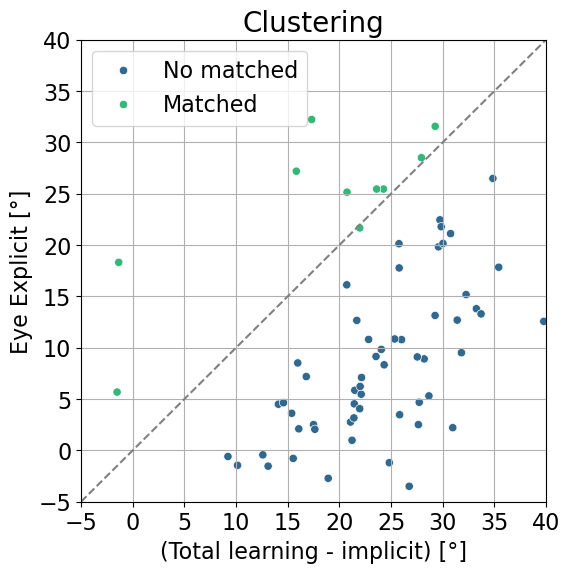

In [199]:
# 对eye_explicit、implicit、total_learning都乘以-1
final_results['eye_explicit'] *= -1
final_results['implicit'] *= -1
final_results['total_learning'] *= -1
final_results['explicit'] = final_results['total_learning'] - final_results['implicit']

# 1. 计算差异
differences = final_results['eye_explicit'] - final_results['explicit']

# 将差异标准化
scaler = StandardScaler()
differences_scaled = scaler.fit_transform(differences.values.reshape(-1, 1))

# 2. 进行聚类 (K-means 聚类, K=2)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(differences_scaled)

# 聚类后的质心
centroids = kmeans.cluster_centers_

# 如果需要，按质心的值进行排序并重新分配标签
if centroids[0] > centroids[1]:
    clusters = np.where(clusters == 0, 1, 0)  # 交换标签

custom_labels = np.where(clusters == 1, 'Matched', 'No matched')

# 3. 可视化聚类结果
plt.figure(figsize=(6, 6))
sns.scatterplot(x=final_results['explicit'], y=final_results['eye_explicit'], hue=custom_labels, palette='viridis')

# 添加y=x的参考线
plt.axline((0, 0), slope=1, linestyle='--', color='gray')

# 设置坐标轴范围和等距刻度
plt.xlim(-5, 40)  # 设置x轴的范围
plt.ylim(-5, 40)  # 设置y轴的范围
plt.xticks(np.arange(-5, 41, 5), fontsize=16)  # 设置x轴刻度和字体大小
plt.yticks(np.arange(-5, 41, 5), fontsize=16)  # 设置y轴刻度和字体大小
plt.legend(fontsize=16, loc='upper left')
plt.ylabel('Eye Explicit [°]', fontsize=16)
plt.xlabel('(Total learning - implicit) [°]', fontsize=16)
plt.title('Clustering', fontsize=20)

# 显示图形
plt.grid(True)
plt.show()

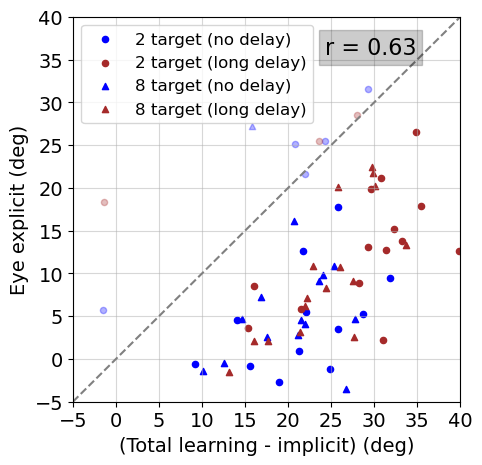

In [200]:
final_results['group'] = np.where(clusters == 1, 'Matched', 'No matched')
# 提取 Matched 和 No matched 组的数据
matched_group = final_results[final_results['group'] == 'Matched']
no_matched_group = final_results[final_results['group'] == 'No matched']

def plot_regression(x, y, experiment, delay, group, xlabel, ylabel, title):
    plt.figure(figsize=(5, 5))

    # 定义颜色、标签和形状
    colors = {1: 'blue', 2: 'brown'}
    labels = {1: 'no delay', 2: 'long delay'}
    shapes = {2: 'o', 8: '^'}  # 2 target: 实心点, 8 target: 三角形

    # 函数绘制每组的数据点
    def plot_group(data, alpha=1):
        for exp in [2, 8]:
            for d in [1, 2]:
                subset = (data['experiment'] == exp) & (data['delay'] == d)
                plt.scatter(
                    data['explicit'][subset], 
                    data['eye_explicit'][subset], 
                    color=colors[d], 
                    alpha=alpha, 
                    label=f"{exp} target ({labels[d]})" if alpha == 1 else None,
                    marker=shapes[exp], 
                    s=20,
                    edgecolor=None
                )

    # 绘制 No matched 组的数据点
    plot_group(no_matched_group)

    # 绘制 Matched 组的数据点，使用 alpha=0.5
    plot_group(matched_group, alpha=0.3)

#     # 绘制回归线，包含所有的 No matched 组数据
#     sns.regplot(x=x, y=y, scatter=False, line_kws={'color': 'k'})

    # 计算 Pearson 相关系数
    correlation, _ = pearsonr(x, y)

    # 显示相关系数
    plt.text(0.65, 0.95, f'r = {correlation:.2f}', ha='left', va='top', 
             transform=plt.gca().transAxes, fontsize=16, 
             bbox=dict(facecolor='k', alpha=0.2))

    # 添加 y=x 的参考线
    plt.axline((0, 0), slope=1, linestyle='--', color='gray')

    # 设置坐标轴范围和等距刻度
    plt.xlim(-5, 40)
    plt.ylim(-5, 40)
    plt.xticks(np.arange(-5, 41, 5), fontsize=14)
    plt.yticks(np.arange(-5, 41, 5), fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
#     plt.title(title, fontsize=16)
    plt.legend(fontsize=12, loc='upper left')  # 调整图例的位置
    plt.grid(True, alpha=0.5)
    plt.show()

# 使用绘图函数
plot_regression(
    no_matched_group['explicit'], 
    no_matched_group['eye_explicit'], 
    no_matched_group['experiment'], 
    no_matched_group['delay'], 
    no_matched_group['group'], 
    '(Total learning - implicit) (deg)', 
    'Eye explicit (deg)', 
    'Correlation in unmatched Group'
)